<img src="data/images/banner.jpg" width=100%>

Welcome to the Midterm Project! Projects in DSC 10 are similar in format to homeworks, but are different in a few key ways. First, a project is comprehensive, meaning that it draws upon everything we've learned this quarter so far. Second, since problems can vary quite a bit in difficulty, some problems will be worth more points than others. Finally, in a project, the problems are more open-ended; they will usually ask for some result, but won't tell you what method should be used to get it. There might be several equally-valid approaches, and several steps might be necessary. This is closer to how data science is done in "real life."

It is important that you **start early** on the project! It will take the place of a homework in the week that it is due, but you should also expect it to take longer than a homework, and you want to leave time to get help in [office hours](https://dsc10.com/calendar/).

You are especially encouraged to **find a partner** to work through the project with. If you work in a pair, you must follow the [Project Partner Guidelines](https://dsc10.com/project-partners/) on the course website. In particular, you must work together at the same time, and you are not allowed to split up the project and each work on certain problems. If you work with a partner, only one of you needs to upload your notebook to Gradescope; after uploading, you'll see an option to add the other partner to the submission.

**Important:** The `otter` tests don't usually tell you that your answer is correct. More often, they help catch basic mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). Directly sharing answers between groups is not okay, but discussing problems with the course staff or with other students is encouraged.

**Avoid looping through DataFrames unless instructed to do so.** Loops in Python are slow, and looping through DataFrames should usually be avoided in favor of the DataFrame methods we've learned in class, which are much faster. **Please do not import any additional packages.** You don't need them, and our autograder may not be able to run your code if you do.

As you work through this project, there are a few resources you may want to have open:
- [DSC 10 Reference Sheet](https://dsc-courses.github.io/bpd-reference/docs/documentation/intro/)
- [`babypandas` notes](https://notes.dsc10.com/front.html)
- Other links in the [Resources](https://dsc10.com/resources/) and [Debugging](https://dsc10.com/debugging/) tabs of the course website

Start early, good luck, and let's begin! 🏃

In [1]:
# Please don't change this cell, but make sure to run it.
import babypandas as bpd
import numpy as np
from IPython.display import HTML, display, IFrame, YouTubeVideo, Markdown, clear_output
import ipywidgets as widgets

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 5)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import otter
import numbers
grader = otter.Notebook()

def play_spotify(uri):
    code = uri[uri.rfind(':')+1:]
    src = f"https://open.spotify.com/embed/track/{code}"
    width = 400
    height = 75
    display(IFrame(src, width, height))

<a id='outline'></a>

### Outline 

The project is divided into four main sections, each of which contains several questions. Use the outline below to help you quickly navigate to the part of the project you're working on. Questions are worth one point each, unless they contain a ⭐️⭐️ next to them, in which case they are worth two points (e.g. **Question 0.3. ⭐️⭐️**). You can expect questions worth two points to be longer and more challenging than questions worth one point.

- [Welcome to `tswift`, it's been waitin' for you! 👩‍💻](#section0)
- [Section 1: Data Visualization 👀](#section1)
- [Section 2:  Song Recommender 🎧](#section2)
- [Section 3: Lyric Searcher 🔍](#section3)
- [Section 4: Keywords 🔑](#section4)


There's also a [Taylor Swift Emoji Quiz 💯](#emojiquiz) at the end of the project, just for fun. Try to identify the Taylor Swift song based on an emoji description, and see how many you can get!

<a id='section0'></a>
## Welcome to `tswift`, it's been waitin' for you! 👩‍💻
<small>(<a href="#outline">return to the outline</a>)</small>

In case you've been living under a rock, allow us to introduce you to Taylor Swift, a famous singer, songwriter, and cultural icon. She has set all kinds of records in the music industry, including earning the most American Music Awards in history. She is also the number one most-streamed artist on Spotify, a digital music streaming service. 

With its origins in country music, Taylor Swift's style has evolved a lot since her 2006 debut album. In her most recent global concert tour, *The Eras Tour*, she guides fans through these musical "eras" in a three-hour performance which fans are paying thousands of dollars to attend. The film version of *The Eras Tour* became the highest-grossing concert film in history in just one weekend when it was released in October 2023.

<img src="data/images/eras.jpg" width=30%>

Chances are, you probably have heard some of Taylor Swift's songs; you might even know the words to all of them. In this project, we'll look at Taylor Swift's songs through the lens of data science. We have data on both the lyrics and audio qualities of Taylor Swift's musical body of work. 

The datasets we will use contain all songs on each of Taylor Swift's [eleven studio albums](https://en.wikipedia.org/wiki/Taylor_Swift_albums_discography#Studio_albums). We've chosen to use deluxe or extended versions of these albums when available, to include more songs, but we've eliminated duplicate versions of songs, such as acoustic versions and remixes. We've also chosen to include the rerecorded "[Taylor's Version](https://www.vox.com/culture/22278732/taylor-swift-re-recording-1989-speak-now-enchanted-mine-master-rights-scooter-braun)" when available. Our datasets don't include Taylor Swift songs that were released as part of movie soundtracks, live recordings, holiday specials, or through any other mechanism.

We'll work with two DataFrames throughout the project:
- The `lyrics` DataFrame contains the lyrics of each Taylor Swift song.  The data in `lyrics` comes from [Genius](https://genius.com/), "the world's biggest collection of song lyrics and crowdsourced musical knowledge."
- The `tswift` DataFrame contains information about the audio features of each song. The data in `tswift` comes from [Spotify](https://open.spotify.com/). 

Let's start by reading in these DataFrames and taking a look around. Run the cell below to load `lyrics`.

In [2]:
lyrics = bpd.read_csv('data/lyrics.csv')
lyrics

,Album,Song,Lyrics
0,The Tortured Poets Department,But Daddy I Love Him,I forget how the West was won\nI forget if thi...
1,The Tortured Poets Department,Cassandra,I was in my new house placing daydreams\nPatch...
2,The Tortured Poets Department,Chloe or Sam or Sophia or Marcus,Your hologram stumbled into my apartment\nHand...
3,The Tortured Poets Department,Clara Bow,"""You look like Clara Bow\nIn this light, remar..."
4,The Tortured Poets Department,Down Bad,Did you really beam me up\nIn a cloud of spark...
...,...,...,...
224,Taylor Swift,Stay Beautiful,"Cory's eyes are like a jungle\nHe smiles, it's..."
225,Taylor Swift,Teardrops On My Guitar,Drew looks at me\nI fake a smile so he won't s...
226,Taylor Swift,The Outside,I didn't know what I would find\nWhen I went l...
227,Taylor Swift,Tied Together With A Smile,Seems the only one who doesn't see your beauty...


**Question 0.1.** Choose an appropriate index for `lyrics` and set the index to that column.

<!--
BEGIN QUESTION
name: q0_1
points: 1
-->

In [3]:
lyrics = lyrics.set_index("Song")
lyrics

,Album,Lyrics
Song,,
But Daddy I Love Him,The Tortured Poets Department,I forget how the West was won\nI forget if thi...
Cassandra,The Tortured Poets Department,I was in my new house placing daydreams\nPatch...
Chloe or Sam or Sophia or Marcus,The Tortured Poets Department,Your hologram stumbled into my apartment\nHand...
Clara Bow,The Tortured Poets Department,"""You look like Clara Bow\nIn this light, remar..."
Down Bad,The Tortured Poets Department,Did you really beam me up\nIn a cloud of spark...
...,...,...
Stay Beautiful,Taylor Swift,"Cory's eyes are like a jungle\nHe smiles, it's..."
Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...
The Outside,Taylor Swift,I didn't know what I would find\nWhen I went l...


In [4]:
grader.check("q0_1")

q0_1 results: All test cases passed!

**Question 0.2.** Set `mastermind` to the lyrics of the song `'Mastermind'`. Compare what happens when you display the value of `mastermind` versus print `mastermind`.

<!--
BEGIN QUESTION
name: q0_2
points: 1
-->

In [5]:
mastermind = lyrics.get("Lyrics").loc["Mastermind"]
print(mastermind)
mastermind

Once upon a time, the planets and the fates
And all the stars aligned
You and I ended up in the same room
At the same time

And the touch of a hand lit the fuse
Of a chain reaction of countermoves
To assess the equation of you
Checkmate, I couldn't lose

What if I told you none of it was accidental?
And the first night that you saw me
Nothing was gonna stop me
I laid the groundwork, and then
Just like clockwork
The dominoes cascaded in a line
What if I told you I'm a mastermind?
And now you're mine
It was all by dеsign
'Cause I'm a mastermind

You see, all the wisеst women
Had to do it this way
'Cause we were born to be the pawn
In every lover's game

If you fail to plan, you plan to fail
Strategy sets the scene for the tale
I'm the wind in our free-flowing sails
And the liquor in our cocktails

What if I told you none of it was accidental?
And the first night that you saw me
I knew I wanted your body
I laid the groundwork, and then
Just like clockwork
The dominoes cascaded in a line
W

"Once upon a time, the planets and the fates\nAnd all the stars aligned\nYou and I ended up in the same room\nAt the same time\n\nAnd the touch of a hand lit the fuse\nOf a chain reaction of countermoves\nTo assess the equation of you\nCheckmate, I couldn't lose\n\nWhat if I told you none of it was accidental?\nAnd the first night that you saw me\nNothing was gonna stop me\nI laid the groundwork, and then\nJust like clockwork\nThe dominoes cascaded in a line\nWhat if I told you I'm a mastermind?\nAnd now you're mine\nIt was all by dеsign\n'Cause I'm a mastermind\n\nYou see, all the wisеst women\nHad to do it this way\n'Cause we were born to be the pawn\nIn every lover's game\n\nIf you fail to plan, you plan to fail\nStrategy sets the scene for the tale\nI'm the wind in our free-flowing sails\nAnd the liquor in our cocktails\n\nWhat if I told you none of it was accidental?\nAnd the first night that you saw me\nI knew I wanted your body\nI laid the groundwork, and then\nJust like clockwo

In [6]:
grader.check("q0_2")

q0_2 results: All test cases passed!

Since the lyrics data is all text, you'll be working a lot with strings throughout this project. Make sure to review the [available string methods](https://docs.python.org/3/library/stdtypes.html#string-methods) so you know how to work with the lyrics data effectively.

Next, let's look at the `tswift` DataFrame. Run the cell below to load in the DataFrame and take a look around. Songs are ordered by `'Popularity'`.

In [7]:
tswift = bpd.read_csv('data/tswift.csv')
tswift

,URI,Album,Song Name,Popularity,Disc Number,Track Number,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
0,1BxfuPKGuaTgP7aM0Bbdwr,Lover,Cruel Summer,90,1,2,False,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427,4
1,2OzhQlSqBEmt7hmkYxfT6m,The Tortured Poets Department,Fortnight (Ft. Post Malone),86,1,1,False,0.504,0.386,11,-10.976,1,0.0308,0.50200,0.000015,0.0961,0.281,192.004,228965,4
2,1dGr1c8CrMLDpV6mPbImSI,Lover,Lover,85,1,3,False,0.359,0.543,7,-7.582,1,0.0919,0.49200,0.000016,0.1180,0.453,68.534,221307,4
3,3hUxzQpSfdDqwM3ZTFQY0K,folklore,august,85,1,8,False,0.532,0.623,5,-9.208,1,0.0331,0.53800,0.000073,0.0925,0.403,89.937,261923,4
4,4R2kfaDFhslZEMJqAFNpdd,folklore,cardigan,84,1,2,False,0.613,0.581,0,-8.588,0,0.0424,0.53700,0.000345,0.2500,0.551,130.033,239560,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2ZoOmCSgj0ypVAmGd1ve4y,Taylor Swift,Stay Beautiful,50,1,8,False,0.594,0.629,8,-4.919,1,0.0246,0.08680,0.000000,0.1370,0.504,131.597,236053,4
225,6K0CJLVXqbGMeJSmJ4ENKK,Taylor Swift,Tied Together With A Smile,50,1,7,False,0.479,0.578,2,-4.963,1,0.0294,0.52500,0.000000,0.0841,0.192,146.165,248107,4
226,2QA3IixpRcKyOdG7XDzRgv,Taylor Swift,The Outside,49,1,6,False,0.589,0.805,5,-4.055,1,0.0293,0.00491,0.000000,0.2400,0.591,112.982,207107,4
227,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,Invisible,49,1,13,False,0.612,0.394,7,-5.723,1,0.0243,0.63700,0.000000,0.1470,0.233,96.001,203227,4


`tswift` contains a lot of information! We've used the [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) provided by Spotify to create the table below, which describes the columns present in `tswift` and what they represent. Note that many of these features (such as `'Valence'`) are defined and determined by Spotify. We have no way of knowing exactly how they determine the values of these audio features for each song, as their algorithms are proprietary.

| Variable Name | Data Type | Explanation |
| -------- | ------- | ------- |
| `'URI'`  | str | Unique identifier for the song in Spotify. |
| `'Album'`  | str | Album name. |
| `'Song Name'`  | str | Song name. |
| `'Disc Number'`  | int | Disc number, usually 1 unless the album contains more than 1 disc. |
| `'Track Number'`  | int | The number of the track on the specified disc. |
| `'Popularity'`  | int | 0 to 100 scale of the current popularity of the song. |
| `'Explicit'`  | bool | True if the song contains explicit words, False otherwise. |
| `'Danceability'`  | float | 0 to 1 scale of how suitable a track is for dancing. |
| `'Energy'`  | float | 0 to 1 scale of a track's activity and intensity. |
| `'Key'`  | int | The average key/pitch of a track, where 0 = C, 1 = C#/Db, 2 = D, and so on. |
| `'Loudness'`  | float | The average loudness of a track, measured on a relative scale in decibels. Values typically range between -60 (softer) and 0 (louder). |
| `'Mode'`  | int | Either 0 for a minor key, or 1 for a major key.|
| `'Speechiness'`  | float | 0 to 1 scale measuring the prevalence of spoken words. |
| `'Acousticness'`  | float | 0 to 1 scale measuring how likely a track is to be acoustic. |
| `'Instrumentalness'`  | float | 0 to 1 scale measuring how likely a track is to be instrumental (without vocals). |
| `'Liveness'`  | float | 0 to 1 scale measuring how likely a track is to have been recorded with a live audience.|
| `'Valence'`  | float | 0 to 1 scale of how positive or happy a track is. |
| `'Tempo'`  | float | The estimated number of beats per minute. |
| `'Duration_ms'`  | int | Length of song in milliseconds. |
| `'Time Signature'`  | int | The number of beats in each bar (or measure). |

One piece of information we'd like to have in `tswift`, which is currently missing, is the year in which each album was released. This variable would allow us to explore trends over time. The `albums` DataFrame contains the information we need. Run the next cell to load it in.

In [8]:
albums = bpd.read_csv('data/albums.csv')
albums

,Album,Release Date
0,Taylor Swift,"October 24, 2006"
1,Fearless,"November 11, 2008"
2,Speak Now,"October 25, 2010"
3,Red,"October 22, 2012"
4,1989,"October 27, 2014"
...,...,...
6,Lover,"August 23, 2019"
7,folklore,"July 24, 2020"
8,evermore,"December 11, 2020"
9,Midnights,"October 21, 2022"


In [9]:
def get_year(date):
    return int(date.split(", ")[1])

**Question 0.3.** ⭐⭐ Add a column to `tswift` called `'Year'` that contains the year of each song's release, as an int, based on the data in `albums`. 

***Note:*** This problem has two stars because it's a multi-step, more challenging problem. Take it one step at a time. Feel free to create additional cells.

In [10]:
tswift = tswift.merge(albums, on="Album")
tswift = tswift.assign(Year = tswift.get("Release Date").apply(get_year)).drop(columns=["Release Date"])
tswift

,URI,Album,Song Name,Popularity,Disc Number,Track Number,Explicit,Danceability,Energy,Key,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Year
0,1BxfuPKGuaTgP7aM0Bbdwr,Lover,Cruel Summer,90,1,2,False,0.552,0.702,9,...,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427,4,2019
1,1dGr1c8CrMLDpV6mPbImSI,Lover,Lover,85,1,3,False,0.359,0.543,7,...,1,0.0919,0.49200,0.000016,0.1180,0.453,68.534,221307,4,2019
2,3RauEVgRgj1IuWdJ9fDs70,Lover,The Man,79,1,4,False,0.777,0.658,0,...,1,0.0540,0.07670,0.000000,0.0901,0.633,110.048,190360,4,2019
3,6RRNNciQGZEXnqk8SQ9yv5,Lover,You Need To Calm Down,77,1,14,False,0.771,0.671,2,...,1,0.0553,0.00929,0.000000,0.0637,0.714,85.026,171360,4,2019
4,1fzAuUVbzlhZ1lJAx9PtY6,Lover,Daylight,77,1,18,False,0.557,0.496,0,...,1,0.0563,0.80800,0.000173,0.0772,0.265,149.983,293453,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2ZoOmCSgj0ypVAmGd1ve4y,Taylor Swift,Stay Beautiful,50,1,8,False,0.594,0.629,8,...,1,0.0246,0.08680,0.000000,0.1370,0.504,131.597,236053,4,2006
225,6K0CJLVXqbGMeJSmJ4ENKK,Taylor Swift,Tied Together With A Smile,50,1,7,False,0.479,0.578,2,...,1,0.0294,0.52500,0.000000,0.0841,0.192,146.165,248107,4,2006
226,2QA3IixpRcKyOdG7XDzRgv,Taylor Swift,The Outside,49,1,6,False,0.589,0.805,5,...,1,0.0293,0.00491,0.000000,0.2400,0.591,112.982,207107,4,2006
227,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,Invisible,49,1,13,False,0.612,0.394,7,...,1,0.0243,0.63700,0.000000,0.1470,0.233,96.001,203227,4,2006


In [11]:
grader.check("q0_3")

q0_3 results: All test cases passed!

Now that `tswift` has all of the information we need, we'll set its index to `'URI'`, since we were told in the data description table that `'URI'`s are unique.

In [12]:
tswift = tswift.set_index('URI')
tswift

,Album,Song Name,Popularity,Disc Number,Track Number,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Year
URI,,,,,,,,,,,,,,,,,,,,
1BxfuPKGuaTgP7aM0Bbdwr,Lover,Cruel Summer,90,1,2,False,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427,4,2019
1dGr1c8CrMLDpV6mPbImSI,Lover,Lover,85,1,3,False,0.359,0.543,7,-7.582,1,0.0919,0.49200,0.000016,0.1180,0.453,68.534,221307,4,2019
3RauEVgRgj1IuWdJ9fDs70,Lover,The Man,79,1,4,False,0.777,0.658,0,-5.191,1,0.0540,0.07670,0.000000,0.0901,0.633,110.048,190360,4,2019
6RRNNciQGZEXnqk8SQ9yv5,Lover,You Need To Calm Down,77,1,14,False,0.771,0.671,2,-5.617,1,0.0553,0.00929,0.000000,0.0637,0.714,85.026,171360,4,2019
1fzAuUVbzlhZ1lJAx9PtY6,Lover,Daylight,77,1,18,False,0.557,0.496,0,-9.602,1,0.0563,0.80800,0.000173,0.0772,0.265,149.983,293453,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2ZoOmCSgj0ypVAmGd1ve4y,Taylor Swift,Stay Beautiful,50,1,8,False,0.594,0.629,8,-4.919,1,0.0246,0.08680,0.000000,0.1370,0.504,131.597,236053,4,2006
6K0CJLVXqbGMeJSmJ4ENKK,Taylor Swift,Tied Together With A Smile,50,1,7,False,0.479,0.578,2,-4.963,1,0.0294,0.52500,0.000000,0.0841,0.192,146.165,248107,4,2006
2QA3IixpRcKyOdG7XDzRgv,Taylor Swift,The Outside,49,1,6,False,0.589,0.805,5,-4.055,1,0.0293,0.00491,0.000000,0.2400,0.591,112.982,207107,4,2006


Now we have our data in the format we need for the rest of the project. In the next two sections of the project, we'll work with the `tswift` DataFrame. Then we'll pivot to work with the `lyrics` DataFrame in the last two sections. Let's begin!

<a id='section1'></a>
## Section 1: Data Visualization 👀

> And you just watched it happen.   

<small>(<a href="#outline">return to the outline</a>)</small>

In this section, we'll use the `tswift` DataFrame to create visualizations that will help us answer questions about Taylor Swift's music, including:
- How many songs did Taylor Swift release each year?
- How do different audio features such as `'Loudness'` and `'Energy'` relate to one another?
- Are Taylor Swift's songs generally more positive or more negative?
- Which Taylor Swift album has the most songs in a minor key?

**Question 1.1.** ⭐⭐ Let's start by determining how many songs Taylor Swift released each year. If we think of `'Year'` as a numerical variable, it makes sense to visualize its distribution with a histogram. Create a density histogram showing the distribution of `'Year'` in the `tswift` DataFrame.

To get the x-axis labels to display nicely, include the optional `xticks` argument in your call to `.plot`. This optional argument specifies where the x-axis labels should be placed. For this plot, set `xticks = np.arange(2006, 2027, 2)` to get tick marks at even-numbered years. Also use the optional argument `title` to give your histogram a meaningful title.

Set the bins such that each bin represents one year, from 2006 to 2024, inclusive. Be careful with the endpoints; in particular, **make sure 2023 and 2024 are not binned together**. 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_1_plot
points: 1
manual: True
-->

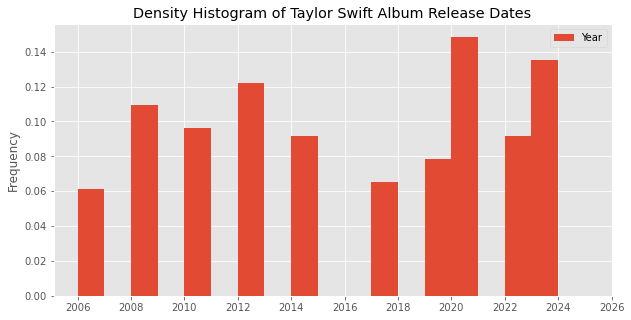

In [13]:
tswift.plot(kind="hist", density=True, y="Year", bins = np.arange(2006, 2025, 1) , title="Density Histogram of Taylor Swift Album Release Dates", xticks=np.arange(2006, 2027, 2));

<!-- END QUESTION -->

Use the plot to determine the proportion of songs released _before_ 2010. After looking at the plot, store the proportion in the variable `before_2010` by manually typing it in, as a float, to the nearest two decimal places. 

<!--
BEGIN QUESTION
name: q1_1
points: 1
-->

In [14]:
before_2010 = .17
before_2010

0.17

In [15]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.**  While `'Year'` can be a numerical variable, it can also be treated as a categorical variable, in which case it would be appropriate to visualize its distribution with a bar chart. Create a vertical bar chart showing the distribution of `'Year'`. Make sure to give your plot a meaningful title, and make sure the bars appear chronologically from left to right.

In [16]:
# Create your vertical bar chart here.

Use the plot to determine the year with the most songs. After looking at the plot, store the year in the variable `year_with_most_songs` by manually typing it in, as an int.

<!--
BEGIN QUESTION
name: q1_2
points: 1
-->

In [17]:
year_with_most_songs = 2020
year_with_most_songs

2020

In [18]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Taylor Swift actually released two albums, sometimes called sister albums 👯, in the `year_with_most_songs`. Use code to find out which two albums were released that year. Specifically, set `sister_albums` to an array containing the names of these albums as strings, in any order. Do not type in the album names manually; write code to get them for you.

***Hint:*** The Series method `.unique()` might be helpful.

<!--
BEGIN QUESTION
name: q1_3
points: 1
-->

In [19]:
sister_albums = tswift[tswift.get("Year")==year_with_most_songs].get("Album").unique().astype(str)
sister_albums

array(['folklore', 'evermore'], dtype='<U8')

In [20]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Create a visualization *or* write code to answer the following question:

> Which album has the most songs?

Save the name of the album as `most_songs_album`. If you create a visualization to answer the question, it's fine to hardcode the answer as a string; if you write code to answer the question, it's fine to assign `most_songs_album` to an expression that evaluates to a string.

<!--
BEGIN QUESTION
name: q1_4
points: 1
-->

In [21]:
most_songs_album = tswift.groupby("Album").count().sort_values(by="Popularity", ascending=False).index[0]
most_songs_album

'The Tortured Poets Department'

In [22]:
grader.check("q1_4")

q1_4 results: All test cases passed!

The `'Popularity'` column in `tswift` contains a number, on a scale of 0 to 100, that ranks how popular a track currently is, relative to other tracks on Spotify. Every stream, save, share, like, and playlist recommendation contributes to a song's `'Popularity'`. Songs with a higher `'Popularity'` are more likely to be recommended to new listeners and added to algorithmically-generated playlists.

**Question 1.5.** What are the most and least popular Taylor Swift songs right now? Save your answers as `most_pop` and `least_pop`, respectively.

<!--
BEGIN QUESTION
name: q1_5
points: 1
-->

In [23]:
most_pop = tswift.sort_values(by="Popularity", ascending=False).get("Song Name").iloc[0]
least_pop = tswift.sort_values(by="Popularity", ascending=False).get("Song Name").iloc[-1]

print(f'The most popular Taylor Swift song right now is {most_pop}.')
print(f'The least popular Taylor Swift song right now is {least_pop}.')

The most popular Taylor Swift song right now is Cruel Summer.
The least popular Taylor Swift song right now is A Perfectly Good Heart.


In [24]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** ⭐⭐ Create a DataFrame named `popularity_by_year` that is indexed by `'Year'` and has two columns:
- `'Max_Popularity'` should contain the highest popularity among all songs released that year.
- `'Median_Popularity'` should contain the median popularity of all songs released that year. 

<!--
BEGIN QUESTION
name: q1_6
points: 2
-->

In [25]:
max_pop = tswift.groupby(by="Year").max().get(["Popularity"])
med_pop = tswift.groupby(by="Year").median().get(["Popularity"])
popularity_by_year = max_pop.merge(med_pop,left_index=True, right_index=True)
popularity_by_year = popularity_by_year.assign(Max_Popularity=popularity_by_year.get("Popularity_x"), Median_Popularity=popularity_by_year.get("Popularity_y")).drop(columns=["Popularity_x", "Popularity_y"])

popularity_by_year

,Max_Popularity,Median_Popularity
Year,,
2006,68,52.0
2008,79,61.0
2010,77,66.0
2012,79,66.0
2014,76,68.0
2017,83,74.0
2019,90,73.0
2020,85,65.0
2022,82,69.0


In [26]:
grader.check("q1_6")

q1_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.7.** Create an overlaid line plot showing how the `'Max_Popularity'` and `'Median_Popularity'` are related to `'Year'`. Give your plot an appropriate title and set `xticks` as you did in Question 1.1.

<!--
BEGIN QUESTION
name: q1_7
manual: true
points: 1
-->

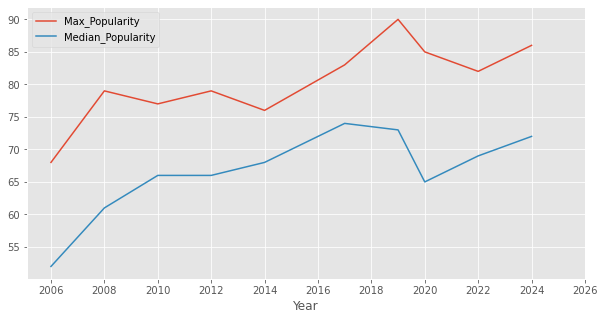

In [27]:
popularity_by_year.plot(kind="line", xticks = np.arange(2006, 2027, 2));

<!-- END QUESTION -->



**Question 1.8.** Let's explore the relationship between different variables in the `tswift` dataset. Specifically:
- `'Loudness'` is the average loudness of a track measured on a relative scale in decibels. Values typically range between -60 (softer) and 0 (louder).
- `'Energy'` is a 0 to 1 scale of a track's activity and intensity, where higher values are more energetic.

In the cell below, create a plot that shows the relationship between `'Loudness'` (on the horizontal axis) and `'Energy'` (on the vertical axis) in Taylor Swift's songs. Include an appropriate title. We've included some additional code to draw the best-fitting line to describe the relationship between these variables. We'll learn more about best-fitting lines when we study regression later in the course!

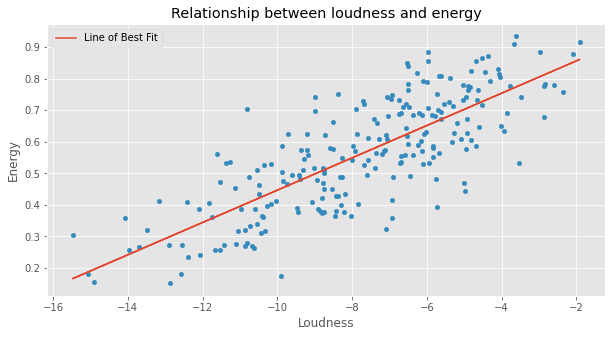

In [28]:
# Create your plot here.
tswift.plot(kind="scatter", x="Loudness", y="Energy", title="Relationship between loudness and energy")
# The code below plots the line of best fit; do not alter it!
x = tswift.get('Loudness')
y = tswift.get('Energy')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, label='Line of Best Fit')        
plt.legend()
plt.show()

What is the relationship between `'Loudness'` and `'Energy'` for Taylor Swift's songs? Set `q1_8` to either 1, 2, or 3, corresponding to your choice from the options below. 

1. Louder songs tend to be lower in energy.
1. Louder songs tend to be higher in energy.
1. There is no clear relationship between `'Loudness'` and `'Energy'`.

<!--
BEGIN QUESTION
name: q1_8
points: 1
-->

In [29]:
q1_8 = 2

In [30]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 1.9.** Another one of Spotify's audio features is `'Valence'`, which measures the positivity, or "happiness", of a track on a 0 to 1 scale. Larger values correspond to more positive songs.

In the cell below, create a plot that shows the relationship between `'Valence'` (on the horizontal axis) and `'Popularity'` (on the vertical axis) in Taylor Swift's songs. Include an appropriate title. As in the previous question, we've included code to plot the best-fitting line.

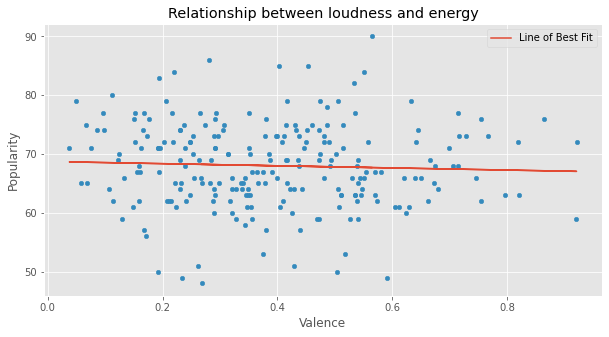

In [31]:
# Create your plot here.
tswift.plot(kind="scatter", x="Valence", y="Popularity", title="Relationship between loudness and energy");
# The code below plots the line of best fit; do not alter it!
x = tswift.get('Valence')
y = tswift.get('Popularity')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, label='Line of Best Fit')        
plt.legend()
plt.show()

What is the relationship between `'Valence'` and `'Popularity'` for Taylor Swift's songs? Set `q1_9` to either 1, 2, or 3, corresponding to your choice from the options below.

1. Positive songs tend to be less popular.
1. Positive songs tend to be more popular.
1. There is no clear relationship between `'Valence'` and `'Popularity'`.

<!--
BEGIN QUESTION
name: q1_9
points: 1
-->

In [32]:
q1_9 = 3

In [33]:
grader.check("q1_9")

q1_9 results: All test cases passed!

**Question 1.10.** Create a plot that visualizes the distribution of `'Valence'` for all of Taylor Swift's songs. Include an appropriate title.

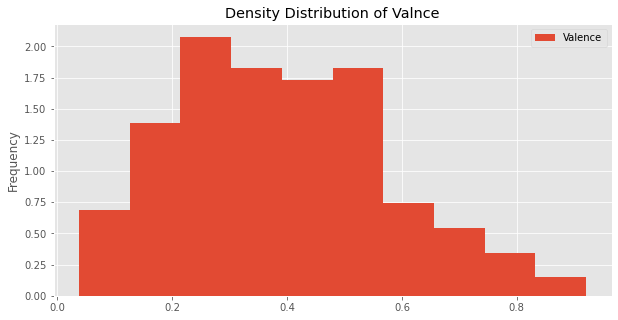

In [34]:
tswift.plot(kind="hist", density=True, y="Valence", title="Density Distribution of Valnce");

Are Taylor Swift's songs more negative or positive on average?  Set `q1_10` to either 1 or 2, corresponding to your choice from the options below.

1. Taylor Swift's songs are more negative on average.
2. Taylor Swift's songs are more positive on average.

<!--
BEGIN QUESTION
name: q1_10
points: 1
-->

In [35]:
q1_10 = 1

In [36]:
grader.check("q1_10")

q1_10 results: All test cases passed!

In the `tswift` DataFrame, the `'Mode'` of a song is 1 if the song is written in a major key or 0 if it's written in a minor key. Generally, songs in a major key (e.g. G major) sound more upbeat, bright, and fun, while songs in a minor key (e.g. D minor) sound more dark, sad, or serious.

For example, the song `'Shake It Off'`, from the album `'1989'`, has a `'Mode'` of 1 because it was written in G major. Run the cell below and press play to hear a snippet of it right here in your notebook.

In [37]:
play_spotify('3fthfkkvy9av3q3uAGVf7U')

On the other hand, the song `'Look What You Made Me Do'`, from the album `'Reputation'`, has a `'Mode'` of 0 because it was written in A minor. Again, run the cell below and press play to hear a snippet of it.

In [38]:
play_spotify('1P17dC1amhFzptugyAO7Il')

**Question 1.11.** ⭐⭐ Create a plot that shows the number of songs in a minor key on each album, but **only among albums with at least two songs in a minor key**. Make sure your plot has a title and a legend that accurately describe what is being shown.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_11
points: 2
manual: true
-->

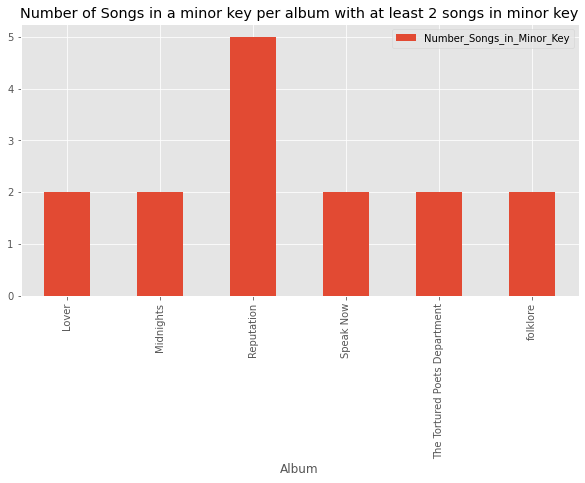

In [39]:
# Create your plot here.
only_minor = tswift[tswift.get("Mode")==0]
albums = only_minor.groupby("Album").count()
albums = albums[albums.get("Popularity")>=2]
albums = albums.assign(Number_Songs_in_Minor_Key = albums.get("Popularity"))
albums.plot(kind="bar", y="Number_Songs_in_Minor_Key", title="Number of Songs in a minor key per album with at least 2 songs in minor key");


<!-- END QUESTION -->

**Question 1.12.** Next, let's explore how certain audio features differ from one album to another. Since we only have audio features for songs, not albums, we'll calculate the values of an audio feature for an album by averaging the values of that audio feature across all songs on the album. For example, to compute the `'Energy'` of the `'Midnights'` album, we would compute the mean `'Energy'` of all songs on the `'Midnights'` album.

Below, complete the implementation of the function `sort_albums_by`, which takes in the column name of an audio feature (e.g. `'Energy'`) and returns an array of the names of all eleven Taylor Swift albums, with the albums sorted in descending order of the given feature. For example, `sort_albums_by('Energy')` would return an array whose first element is the name of the album with the highest mean `'Energy'` across all its songs.

<!--
BEGIN QUESTION
name: q1_12
points: 1
-->

In [40]:
def sort_albums_by(feature):
    grouped = tswift.groupby("Album").mean()
    feature_df = grouped.get([feature]).sort_values(by=feature, ascending=False)
    return np.array(feature_df.index)
    

In [41]:
sort_albums_by("Energy")

array(['1989', 'Taylor Swift', 'Speak Now', 'Fearless', 'Red',
       'Reputation', 'Lover', 'evermore', 'Midnights',
       'The Tortured Poets Department', 'folklore'], dtype=object)

In [42]:
grader.check("q1_12")

q1_12 results: All test cases passed!

Now, run the cell below to see how the albums rank for each audio feature.

In [43]:
features = ['Popularity', 'Explicit', 'Danceability', 'Energy', 'Loudness',
            'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
            'Valence', 'Duration_ms', 'Tempo']

for feature in features:
    # These lines display the output nicely. You don't need to understand how they work.
    display(Markdown(f"Taylor Swift albums, in descending order of `'{feature}'`:"))
    display(Markdown("- " + ", ".join(sort_albums_by(feature))))

Taylor Swift albums, in descending order of `'Popularity'`:

- Lover, Reputation, The Tortured Poets Department, folklore, 1989, Midnights, Speak Now, Red, evermore, Fearless, Taylor Swift

Taylor Swift albums, in descending order of `'Explicit'`:

- The Tortured Poets Department, evermore, Midnights, folklore, Red, 1989, Fearless, Lover, Reputation, Speak Now, Taylor Swift

Taylor Swift albums, in descending order of `'Danceability'`:

- Lover, Reputation, 1989, Midnights, Red, folklore, Taylor Swift, Speak Now, Fearless, The Tortured Poets Department, evermore

Taylor Swift albums, in descending order of `'Energy'`:

- 1989, Taylor Swift, Speak Now, Fearless, Red, Reputation, Lover, evermore, Midnights, The Tortured Poets Department, folklore

Taylor Swift albums, in descending order of `'Loudness'`:

- Speak Now, Taylor Swift, Fearless, Red, 1989, Reputation, Lover, The Tortured Poets Department, evermore, folklore, Midnights

Taylor Swift albums, in descending order of `'Speechiness'`:

- Lover, Midnights, Reputation, evermore, The Tortured Poets Department, 1989, Red, folklore, Speak Now, Fearless, Taylor Swift

Taylor Swift albums, in descending order of `'Acousticness'`:

- evermore, folklore, The Tortured Poets Department, Midnights, Lover, Taylor Swift, Fearless, Speak Now, Red, Reputation, 1989

Taylor Swift albums, in descending order of `'Instrumentalness'`:

- Midnights, evermore, 1989, Lover, folklore, The Tortured Poets Department, Red, Taylor Swift, Reputation, Fearless, Speak Now

Taylor Swift albums, in descending order of `'Liveness'`:

- Taylor Swift, Fearless, Reputation, 1989, The Tortured Poets Department, Midnights, Speak Now, Red, Lover, evermore, folklore

Taylor Swift albums, in descending order of `'Valence'`:

- Lover, Red, evermore, Fearless, Taylor Swift, 1989, Speak Now, folklore, The Tortured Poets Department, Reputation, Midnights

Taylor Swift albums, in descending order of `'Duration_ms'`:

- Speak Now, Red, Fearless, evermore, The Tortured Poets Department, folklore, Reputation, 1989, Taylor Swift, Midnights, Lover

Taylor Swift albums, in descending order of `'Tempo'`:

- Fearless, Speak Now, Reputation, The Tortured Poets Department, Taylor Swift, evermore, 1989, Lover, folklore, Red, Midnights

**Question 1.13.** Let's look closely at one result from above, duplicated below. Recall that `'Explicit'` is a Boolean variable that determines whether the song includes explicit words. 🤬

In [44]:
display(Markdown(f"Taylor Swift albums, in descending order of `'Explicit'`:"))
display(Markdown("- " + ", ".join(sort_albums_by('Explicit'))))

Taylor Swift albums, in descending order of `'Explicit'`:

- The Tortured Poets Department, evermore, Midnights, folklore, Red, 1989, Fearless, Lover, Reputation, Speak Now, Taylor Swift

What can you conclude based only on the information displayed by the cell above? Assign a list with the numbers of all the true statements to the variable `q1_13`.

1. There are more explicit words in `'The Tortured Poets Department'` than in `'evermore'`. 
2. A higher fraction of songs on `'The Tortured Poets Department'` use explicit words than on `'evermore'`.
3. There are more songs that use explicit words in `'The Tortured Poets Department'` than on `'evermore'`.
4. If you randomly select a song from `'The Tortured Poets Department'`, the probability it contains explicit words exceeds the probability that a randomly selected song from `'evermore'` contains explicit words. 

***Note:*** You can assume that `'The Tortured Poets Department'` and `'evermore'` are not tied for most explicit album.

<!--
BEGIN QUESTION
name: q1_13
points: 1
-->

In [45]:
q1_13 = [2, 4]

In [46]:
grader.check("q1_13")

q1_13 results: All test cases passed!

**Question 1.14.** ⭐⭐ While Taylor Swift is primarily a solo artist, she has collaborated with other artists on a number of songs. For example, she featured Lana Del Rey in the song `'Snow On The Beach (Ft. Lana Del Rey)'` and Post Malone in `'Fortnight (Ft. Post Malone)'`. All the collaborative songs in `tswift` are indicated by `'Ft.'` in the name of the song, just like in these examples.

Create an overlaid vertical bar chart that allows you to compare the average values of `'Explicit'`, `'Danceability'` and `'Acousticness'` for collaborative songs versus solo songs. Make sure your plot has a title and a legend that accurately describes what is being shown.

***Note:*** There is more than one way you can approach this question. Any bar chart that allows you to compare the desired quantities will work!

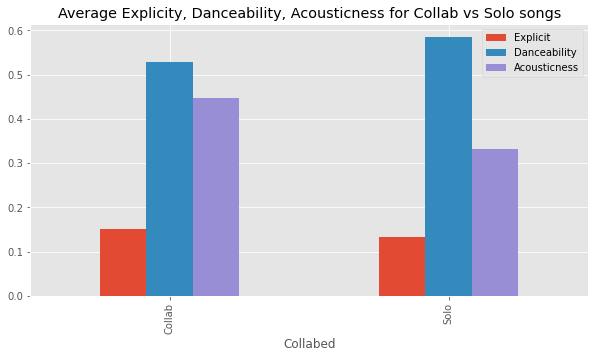

In [47]:
# Create your plot here.
def hasCollabed(songName):
    if "Ft." in songName:
        return "Collab"
    return "Solo"


collabs = tswift.assign(Collabed = tswift.get("Song Name").apply(hasCollabed))
grouped = collabs.groupby("Collabed").mean().get(["Explicit", "Danceability", "Acousticness"])
grouped.plot(kind="bar", title="Average Explicity, Danceability, Acousticness for Collab vs Solo songs");

Do collaborative songs have higher values of `'Explicit'`, `'Danceability'`, and `'Acousticness'` than solo songs, on average? Assign a list with the numbers of all the true statements to the variable `q1_14`.

1. Collaborative songs have a higher value of `'Explicit'` than solo songs, on average.
1. Collaborative songs have a higher value of `'Danceability'` than solo songs, on average.
1. Collaborative songs have a higher value of `'Acousticness'` than solo songs, on average.

<!--
BEGIN QUESTION
name: q1_14
points: 2
-->

In [48]:
q1_14 = [1, 3]

In [49]:
grader.check("q1_14")

q1_14 results: All test cases passed!

<a id='section2'></a>
## Section 2: Song Recommender 🎧

> Your favorite song was playing from the far side of the gym.

<small>(<a href="#outline">return to the outline</a>)</small>

In this section, we'll create a Taylor Swift song recommender tool. The tool will allow you to input a song you like, selected from a collection of popular songs  on Spotify, and it will recommend to you the songs in Taylor Swift's body of work that are most similar to your input song.

We are already familiar with the `tswift` DataFrame; this contains the Taylor Swift songs from which we will make our recommendations.  

We will also use a separate dataset of allowed input songs. For this, we have a [collection of popular songs with more than one billion streams](https://open.spotify.com/playlist/37i9dQZF1DX7iB3RCnBnN4) on Spotify. Let's load in this data and store it in the DataFrame `billions_club`. `billions_club` contains all the same columns as `tswift`, except that it doesn't have a `'Year'` column, and it has an additional column named `'Artist'`, because it includes songs by a variety of artists.

In [50]:
billions_club = bpd.read_csv('data/billions_club.csv').set_index('URI')
billions_club

,Album,Song Name,Artist,Disc Number,Track Number,Popularity,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
URI,,,,,,,,,,,,,,,,,,,,
02dRkCEc8Q5ch4TTcnLxOn,Late Night Feelings,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson; Miley Cyrus,1,9,76,False,0.601,0.794,7,-5.844,0,0.0671,0.00987,0.000001,0.4180,0.244,114.066,217099,4
4kV4N9D1iKVxx1KLvtTpjS,"thank u, next","break up with your girlfriend, i'm bored",Ariana Grande,1,12,73,True,0.727,0.554,5,-5.290,0,0.0915,0.04210,0.000000,0.1060,0.335,170.000,190440,4
07nH4ifBxUB4lZcsf44Brn,Motion,Blame (feat. John Newman),Calvin Harris; John Newman,1,3,80,False,0.414,0.857,0,-4.078,0,0.0808,0.02870,0.005740,0.3430,0.348,128.024,212960,4
6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,BIRDS OF A FEATHER,Billie Eilish,1,4,98,False,0.747,0.507,2,-10.171,1,0.0358,0.20000,0.060800,0.1170,0.438,104.978,210373,4
76JKIsdKrAfWUMjaA0u7v5,Unreal Unearth: Unaired,Too Sweet,Hozier,2,1,78,False,0.741,0.620,10,-5.505,1,0.0412,0.02950,0.000809,0.0398,0.934,117.038,251424,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0h1W19pS59KtEd7aDzF58i,Scorpion,In My Feelings,Drake,2,9,47,False,0.833,0.619,8,-5.822,1,0.0971,0.04960,0.000087,0.3000,0.366,91.022,217925,4
2b8fOow8UzyDFAE27YhOZM,Memories,Memories,Maroon 5,1,1,25,False,0.764,0.320,11,-7.209,1,0.0546,0.83700,0.000000,0.0822,0.575,91.019,189486,4
116H0KvKr2Zl4RPuVBruDO,MIA (feat. Drake),MIA (feat. Drake),Bad Bunny; Drake,1,1,12,False,0.817,0.539,6,-6.349,0,0.0621,0.01410,0.000496,0.0990,0.158,97.062,210368,4


The goal in this section is to find a song in the `billions_club` DataFrame that we like and use it as an input to our recommender tool to find Taylor Swift songs with a similar sound. The problem is, in the preview of the DataFrame above, we can only see the first few rows and the last few rows of `billions_club`, so it's hard to see all of the possible songs we can choose from. Let's browse the DataFrame by randomly selecting ten rows to display. 

In [51]:
# Run this cell a few times!
billions_club.sample(10).get(['Song Name', 'Artist'])

,Song Name,Artist
URI,,
5xTtaWoae3wi06K5WfVUUH,Shake It Off,Taylor Swift
6eT7xZZlB2mwyzJ2sUKG6w,White Iverson,Post Malone
1xQ6trAsedVPCdbtDAmk0c,Savage Love (Laxed - Siren Beat),Jawsh 685; Jason Derulo
3k3NWokhRRkEPhCzPmV8TW,Ojitos Lindos,Bad Bunny; Bomba Estéreo
0xmjwnQ3FNE6HuWCt2nHdZ,Where Is The Love?,Black Eyed Peas
40YcuQysJ0KlGQTeGUosTC,"Me, Myself & I",G-Eazy; Bebe Rexha
2qT1uLXPVPzGgFOx4jtEuo,no tears left to cry,Ariana Grande
21RzyxY3EFaxVy6K4RqaU9,Body,Loud Luxury; Brando
0QIjsbm2fh1cJ45XO9eGqq,Wake Up in the Sky,Gucci Mane; Bruno Mars; Kodak Black


**Question 2.1.** Run the previous cell a few times until you find a song you like; you'll use this song as the input to the recommender tool. Record the `'URI'` of your favorite song in the variable `favorite_uri`. You should just input this value manually based on what you find from browsing the DataFrame. (You can double-click a value in the index to highlight it, and then copy and paste it below.)

Then, using code, find the `'Song Name'` of this song and save it in the variable `favorite_song_name`.

<!--
BEGIN QUESTION
name: q2_1
points: 1
-->

In [52]:
favorite_uri = "2374M0fQpWi3dLnB54qaLX"
favorite_song_name = "Africa"

print(f'My favorite song is {favorite_song_name}. It has a URI of {favorite_uri}.')

My favorite song is Africa. It has a URI of 2374M0fQpWi3dLnB54qaLX.


In [53]:
grader.check("q2_1")

q2_1 results: All test cases passed!

You can also listen to a preview of your favorite song in the notebook by running the cell below and pressing play.

In [54]:
play_spotify(favorite_uri) 

We will allow our recommender tool to base its recommendations on a customizable set of audio features. When not specified, the tool will use *all* of the audio features that are measured on a 0 to 1 scale, which we'll store in the variable `default_features`. But you can choose to use only a subset of these features when asking for recommendations, based on whatever is important to you!

In [55]:
default_features = [
    'Danceability', 
    'Energy',
    'Speechiness',
    'Acousticness',
    'Instrumentalness',
    'Liveness',
    'Valence'
]

Let's start building our recommender tool! 

The first step of the process is to extract the features of our favorite song from a DataFrame of songs. The thing is, each song is stored as a row of a DataFrame, and we don't have any experience accessing full rows of DataFrames. We typically access entire columns of data using `.get`, but we've never needed to access whole rows before. 

It turns out that the `.loc` accessor that we've used on Series also works on DataFrames. If we use `.loc` directly on a DataFrame, we can extract the contents of an individual row as a Series. When all the values in a row are of the same data type, we can then convert that Series into an array. 

For example, the next cell creates a small example DataFrame.

In [56]:
example_df = bpd.DataFrame().assign(x=[1, 2], y=[3, 4], z=[5, 6])
example_df

,x,y,z
0,1,3,5
1,2,4,6


We can extract the values from the second row of `example_df` as follows.

In [57]:
example_df.loc[1]

x    2
y    4
z    6
Name: 1, dtype: int64

Notice that this is a Series whose index values are the column names of `example_df`. If we want to work with the values in this Series an array, we can convert the Series to an array.

In [58]:
np.array(example_df.loc[1])

array([2, 4, 6])

**Question 2.2.** Use what you just learned about accessing rows to complete the implementation of the function `get_feature_values`. The inputs to `get_feature_values` are:
- `input_uri`, the `'URI'` of a song whose features you want to extract as an array.
- `song_df`, a DataFrame that has a row corresponding to the song with the given `input_uri` and columns containing audio features.
- `feature_list`, a list of features to extract.

It should return an **array** containing the values of the specified features for the song, in the order that they appear in `feature_list`. If there is no song with the given `input_uri` in `song_df`, the function should print `'This URI was not found.'` and return `None`. (`None` is a special Python keyword; it should not go in quotes, and it will turn green when you type it.)

Example behavior is given below.

```py
# This URI corresponds to the song "Creepin' (with The Weeknd & 21 Savage)".
# Query for it in billions_club; you'll see that its 'Valence', 'Instrumentalness', and 'Energy'
# match the values in the array below.
>>> get_feature_values('2dHHgzDwk4BJdRwy9uXhTO', billions_club, ['Valence', 'Instrumentalness', 'Energy'])
array([0.157, 0.   , 0.613 ])
```

After implementing your function, use it to extract some audio features from your favorite song in `billions_club`, whose `'URI'` was stored in `favorite_uri`. You can use any of the audio features in `default_features` that you like.

***Hint:*** Use the `in` keyword to check if `input_uri` is a valid `'URI'`. 

***Note:*** We're writing a very general function that allows `song_df` to be any DataFrame of songs. For now, we'll only call the function with `billions_club` as `song_df`, but later in this section, we'll see how to use the function with `song_df` set to something else.

<!--
BEGIN QUESTION
name: q2_2
points: 1
-->

In [59]:
def get_feature_values(input_uri, song_df, feature_list):
    new_df = song_df.get(feature_list)
    if input_uri not in new_df.index:
        print("This URI was not found.")
        return None
    return np.array(new_df.loc[input_uri])

# Now call your function to extract some audio features of your favorite song.
get_feature_values(favorite_uri, billions_club, ['Danceability', 'Energy'])

array([0.671, 0.373])

In [60]:
grader.check("q2_2")

q2_2 results: All test cases passed!

We now know how to extract the features of a song (as an array) from a DataFrame using `get_feature_values`. But, what will we do with this feature array once we extract it? We'll want to compare the features of our song to the features of each Taylor Swift song to identify the Taylor Swift songs that are most similar to the song we selected. Since each audio feature is numerical, we need a way to compare two arrays of numbers and measure the similarity between them.

For this, we'll use the Euclidean distance, which you may know more simply as just "distance". Euclidean distance is a fundamental concept in geometry used to measure how far away two points are. We're most familiar with this concept in two dimensions, where it corresponds to the distance between two points in the plane. Here is the distance formula in two dimensions:

<p style="text-align: center;"><strong>Distance between two points $(x_1, y_1)$ and $(x_2, y_2)$ in 2 dimensions:</strong></p>

<p style="text-align: center;">$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$</p>

<img src="data/images/distance.png" width=30%>

The picture above shows that the distance formula is really an application of the Pythagorean theorem relating the side lengths of a right triangle: $c^2 = a^2 + b^2$.

However, Euclidean distance is not limited to two dimensions; it can be generalized to more dimensions. In general, in $n$-dimensional space (where $n$ can be any positive integer), we can generalize the Euclidean distance formula as follows:

<p style="text-align: center;"><strong>Distance between two points $(x_1, x_2, \ldots, x_n)$ and $(y_1, y_2, \ldots, y_n)$ in $n$ dimensions:</strong></p>
 
<p style="text-align: center;"> $$ d = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \ldots + (x_n - y_n)^2} $$ </p>

What can we do with this? For our application, let's think of the feature array for a given song as a point in $n$-dimensional space. For example, if the features we care about are `['Valence', 'Acousticness', 'Energy']`, then for any given song, we have a point in 3-dimensional space. Then, to measure how similar two songs are, we can compute the Euclidean distance between their two points in 3-dimensional space. **The closer this distance is to 0, the more similar the two songs are!**

For instance, suppose we want to compute the similarity between the songs `'Sugar'` by `'Maroon 5'` and `'Halo'` by `'Beyonce'` using the aforementioned three features. Using `get_feature_values`:
- `'Sugar'` has the feature array `np.array([0.884 , 0.0591, 0.788])`, and
- `'Halo'` has the feature array `np.array([0.472, 0.272, 0.72])`.

Then, the Euclidean distance between the two songs' points is:

$$\sqrt{(0.884 - 0.472)^2 + (0.0591 - 0.272)^2 + (0.788 - 0.72)^2} = 0.4687...$$

**Question 2.3.** ⭐⭐ Now, let's apply the concept of Euclidean distance to calculate the similarity between two songs. Complete the implementation of the function `calculate_similarity` below. This function takes in two arrays of the same length, which we can think of as two points in $n$-dimensional space, where $n$ is the length of each array. The function should output the Euclidean distance between these two points, as a float, with no rounding.

Example behavior is given below.

```py
# Note: We've hard-coded the inputs to calculate_similarity just for this example;
# typically, you'll find feature arrays by calling your get_feature_values function.
>>> calculate_similarity(np.array([0.287, 0.0885, 0.794]), np.array([0.888, 0.009, 0.787]))
0.6062757211038555
```

Then, use both the `calculate_similarity` and the `get_feature_values` functions you've defined to calculate the similarity (Euclidean distance) between your favorite song and the Taylor Swift song `'Karma'`, based on the features `'Danceability'`, `'Energy'`, `'Valence'`, and `'Acousticness'`. Store your result in `favorite_vs_karma`. 

<!--
BEGIN QUESTION
name: q2_3
points: 2
-->

In [61]:
def calculate_similarity(features_1, features_2):
    return (((features_1-features_2)**2).sum())**0.5

karm_uri = tswift[tswift.get("Song Name")=="Karma"].index[0]
favorite_vs_karma = calculate_similarity(get_feature_values(favorite_uri, billions_club, ["Danceability", "Energy", "Valence"]), get_feature_values(karm_uri, tswift, ["Danceability", "Energy", "Valence"]))
favorite_vs_karma

0.6820571896842669

In [62]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** ⭐⭐ So far, we know how to compute the similarity between two particular songs. Now, let's extend what we've learned to compute the similarity between a given song and *each* of the Taylor Swift songs in `tswift`. 

Use the two functions you've defined so far in this section (`get_feature_values` and `calculate_similarity`) to complete the implementation of the function `calculate_similarity_for_all`. This function should calculate the similarity scores between the input song and each of the Taylor Swift songs in `tswift`, one by one, and output an array of similarity scores.  The inputs to `calculate_similarity_for_all` are:

- `input_uri`, the `'URI'` of a song whose features you will compare to each song in `tswift`.
- `song_df`, a DataFrame that has a row corresponding to the song with the given `input_uri` and columns containing audio features.
- `feature_list`, a list of features to include in the similarity score.

Make sure your output array has the similarities of all songs in the order they appear in the `tswift` DataFrame. For example, if the first song in `tswift` is `'Anti-Hero'` (it may not be), then the first element of your output array should be the similarity between the input song and `'Anti-Hero'`.

While we don't normally iterate through DataFrames, Series, or indexes, in this question, you should use a `for`-loop to iterate through the values in the index of `tswift`, extracting the features from one Taylor Swift song at a time and using those features to compute the similarity with the input song.

A sample function call is provided. Feel free to try other example inputs.
<!--
BEGIN QUESTION
name: q2_4
points: 2
-->

In [63]:
def calculate_similarity_for_all(input_uri, song_df, feature_list):
    similarity_scores = []
    inputList = get_feature_values(input_uri, song_df, feature_list)
    for rowInd in range(tswift.shape[0]):
        row = tswift.reset_index().iloc[rowInd]
        tswiftURI = row.loc["URI"]
        tswiftList = get_feature_values(tswiftURI, tswift, feature_list)
        similarity_scores.append(calculate_similarity(inputList, tswiftList))
    
    return np.array(similarity_scores)

# Feel free to comment this line out or change the arguments!
calculate_similarity_for_all(favorite_uri, billions_club, ['Danceability', 'Energy', 'Valence', 'Acousticness'])

array([0.41258454, 0.5092249 , 0.36711046, 0.40060984, 0.74149511,
       0.4653921 , 0.50241716, 0.72330284, 0.51260316, 0.37419113,
       0.44584724, 0.77151928, 0.6180898 , 0.58730912, 0.20361729,
       0.46102014, 0.7825254 , 0.76702347, 0.53989258, 0.65106374,
       0.4330993 , 0.65334065, 0.76256879, 0.66860826, 0.6892155 ,
       0.72217865, 0.50284192, 0.69702869, 0.49545333, 0.68639784,
       0.77712161, 0.42052467, 0.54789324, 0.75354761, 0.73830143,
       0.34514635, 0.63385882, 0.68190982, 0.49464097, 0.84927911,
       0.41729007, 0.57110682, 0.62158829, 0.73640003, 0.59205067,
       0.80797648, 0.64554938, 0.64437179, 0.66788697, 0.51867427,
       0.39722664, 0.8633464 , 0.86430261, 0.69272866, 0.37495866,
       0.57011665, 0.7583482 , 0.65088401, 0.42029632, 0.72992328,
       0.35849965, 0.83600837, 0.79462884, 0.77598131, 0.56744779,
       0.84827   , 0.58513161, 0.41929226, 0.68858072, 0.54516831,
       0.56619654, 0.52072431, 0.39538651, 0.69297938, 0.50786

In [64]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Now that we have the similarity scores between our input song and every single Taylor Swift song, let's use them to find the Taylor Swift songs that are most similar to our input song. Complete the implementation of the function `select_top_recommendations`, which takes in an array `similarity_scores`, like the one you just created, and a positive integer `n`. The function should return a DataFrame of the `n` songs from `tswift` that correspond to the `n` **lowest** values in `similarity_scores`, sorted in increasing order of similarity score.
- Remember, the most similar songs are the ones whose similarity scores are lowest, because songs are more similar when they have a lower Euclidean distance.
- The DataFrame returned by `select_top_recommendations` should have all the same columns as `tswift`, though as mentioned above, it should only have `n` rows.

***Hint:*** You may want to add a new column to your DataFrame containing the contents of `similarity_scores`. Make sure to drop this column at the end, so that your output DataFrame has exactly `n` rows and 20 columns.
<!--
BEGIN QUESTION
name: q2_5
points: 1
-->

In [65]:
def select_top_recommendations(similarity_scores, n):
    tswiftSim = tswift.assign(sim_scores = similarity_scores).sort_values(by="sim_scores").drop(columns=["sim_scores"])
    return tswiftSim.iloc[:n]

In [66]:
select_top_recommendations(calculate_similarity_for_all(favorite_uri, billions_club, ['Danceability', 'Energy', 'Valence', 'Acousticness']),10)

,Album,Song Name,Popularity,Disc Number,Track Number,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Year
URI,,,,,,,,,,,,,,,,,,,,
43rA71bccXFGD4C8GOpIlN,Lover,I Forgot That You Existed,69,1,1,False,0.664,0.316,5,-10.345,1,0.5190,0.29800,0.000002,0.0812,0.541,92.875,170640,4,2019
1HCdems7PQZRj42QDWLA0A,Speak Now,Timeless,66,1,22,False,0.624,0.585,3,-5.847,1,0.0328,0.30000,0.000000,0.0916,0.650,142.883,321397,4,2010
550erGcdD9n6PnwxrvYqZT,Fearless,Hey Stephen,63,1,4,False,0.788,0.571,6,-6.135,1,0.0296,0.10600,0.000000,0.0934,0.797,115.990,254255,4,2008
6AtZLIzUINvExIUy4QhdjP,Red,I Knew You Were Trouble,73,1,4,False,0.584,0.557,6,-6.371,1,0.0342,0.01290,0.000000,0.0576,0.767,154.008,219760,4,2012
5xXqyjLicvEpch72qEryFT,Speak Now,Speak Now,66,1,4,False,0.727,0.677,7,-2.871,1,0.0325,0.24800,0.000000,0.1430,0.639,118.995,242473,4,2010
4qUijfYU8EoIWiY6oSyrgT,Fearless,Bye Bye Baby,59,1,26,False,0.624,0.624,5,-7.860,1,0.0539,0.33400,0.000000,0.0995,0.527,80.132,242158,4,2008
7eResoqEJJAVTkQYSqvO3P,Fearless,That's When (Ft. Keith Urban),61,1,24,False,0.588,0.608,5,-7.062,1,0.0365,0.22500,0.000000,0.0920,0.508,90.201,189496,4,2008
4e5ayHsOLJNLTGfjau2mEw,Red,The Lucky One,62,1,13,False,0.686,0.571,4,-7.138,1,0.0500,0.06600,0.000000,0.0608,0.538,117.889,240467,4,2012
2XXwLdtuAcE0HSCu61ijAb,The Tortured Poets Department,My Boy Only Breaks His Favorite Toys,72,1,3,False,0.596,0.563,0,-7.362,1,0.0269,0.13700,0.000000,0.3020,0.481,97.073,203801,4,2024


In [67]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Question 2.6.** It's time to combine everything we've implemented so far into a single function. Below, complete the 
implementation of the function `song_recommender`. The inputs to `song_recommender` are:

- `input_uri`, the `'URI'` of a song which you want to find recommendations similar to.
- `song_df`, a DataFrame that has a row corresponding to the song with the given `input_uri` and columns containing audio features.
- `n`, the number of top-matching songs to be shown.
- `feature_list`, a list of features to include in the similarity computation. This is an optional parameter; if not included, the similarity should be based on all features in `default_features`. 
 
The output should be an `n`-row DataFrame whose index contains `'URI'`s and whose only columns are `'Album'`, `'Song Name'`, and the columns included in `feature_list`. Each row in the returned DataFrame should correspond to a song; the songs should be sorted in decreasing order of similarity (that is, in increasing order of similarity score – the same way that the rows are ordered in the output of `select_top_recommendations`).

***Note:*** In the signature of the `song_recommender` function, we set `feature_list=default_features`. This tells Python that `feature_list` is an optional parameter, and if omitted, it should be set to `default_features`. We use functions with default parameter values all the time - for example, in the DataFrame method `.sort_values`, when we don't set the parameter `ascending`, it defaults to having a value of `True`. 

***Hints:***
- You've done most of the work already. It's possible to solve this problem in one (long) line of code. We say this not to encourage you to write one long line of code, but to emphasize that you don't need to write a ton of code within the body of `song_recommender`.
- The `+` symbol, when placed between two lists, concatenates the lists, just like when the `+` symbol is placed between two strings, it concatenates the strings. This will be useful when making sure that your output DataFrame has only certain columns.
<!--
BEGIN QUESTION
name: q2_6
points: 1
-->

In [68]:
def song_recommender(input_uri, song_df, n, feature_list=default_features):
    sims = calculate_similarity_for_all(input_uri, song_df, feature_list)
    top = select_top_recommendations(sims, n)
    return top.get(["Album", "Song Name"]+feature_list)
    
# The following call to song_recommender finds the 5 Taylor Swift songs
# that are most similar to your chosen song, in terms of 'Danceability' and 'Energy'.
# We've also include a print statement to help you interpet the output.
print(f'Taylor Swift songs that are most similar to {favorite_song_name}:')
song_recommender(favorite_uri, billions_club, 5, ['Danceability', 'Energy'])

Taylor Swift songs that are most similar to Africa:


,Album,Song Name,Danceability,Energy
URI,,,,
7FmYn9e7KHMXcxqGSj9LjH,Midnights,Mastermind,0.662,0.357
3rWDp9tBPQR9z6U5YyRSK4,Midnights,Midnight Rain,0.643,0.363
4D7BCuvgdJlYvlX5WlN54t,Midnights,"You're On Your Own, Kid",0.696,0.396
3eX0NZfLtGzoLUxPNvRfqm,Midnights,Maroon,0.637,0.398
0NRHj8hDwwmSPaA41o379r,Red,The Moment I Knew,0.636,0.402


In [69]:
grader.check("q2_6")

q2_6 results: All test cases passed!

Nice work! You now have the ability to pick a song you like and audio features that are important to you and use your function to get back recommendations of Taylor Swift songs that are similar to the song you chose.

But wait – it gets cooler.

The cell below is long, but it sets up an interactive widget, which allows you to choose any song in `billions_club` from a dropdown menu and plays for you the 5 most similar songs from Taylor Swift's repertoire, according to all of the features in `default_features`. Run the cell below to check it out!

In [70]:
# Run this cell. Don't change any of the code.
default = 'Bank Account by 21 Savage'

def get_and_format_recommendations(song_name):
    song, artist = song_name.split(' by ')
    row = billions_club[(billions_club.get('Song Name') == song) & (billions_club.get('Artist') == artist)]
    uri = row.index[0]
    recommendations_df = song_recommender(uri, billions_club, 5, default_features)
    display(HTML(f'<h3>The song you chose was {billions_club.get("Song Name").loc[uri]} by {billions_club.get("Artist").loc[uri]}.</h3>'))
    play_spotify(uri)
    display(HTML('<h4>Here are the 5 most similar Taylor Swift songs we found.</h4>'))
    for recommended_uri in recommendations_df.index:
        play_spotify(recommended_uri)

song_options = np.sort(billions_club.get('Song Name') + ' by ' + billions_club.get('Artist'))
song_widget = widgets.Dropdown(options=song_options, description='Song', layout={'width': '525px'}, value=default)
   
def change_rec(change):
    if change['name'] == 'value' and change['new'] != change['old']:
        clear_output()
        display(song_widget)
        get_and_format_recommendations(song_widget.value)

display(song_widget)
get_and_format_recommendations(default)
song_widget.observe(change_rec)

Dropdown(description='Song', index=49, layout=Layout(width='525px'), options=('1-800-273-8255 by Logic; Alessi…

You did all of the calculations behind-the-scenes to make this widget work – nice job!

Up until now, our goal has been to find the songs in `tswift` that are most similar to our chosen song in `billions_club`. That's what the above widget does.

However, we can also use the functions we've defined to determine the similarity between any pair of songs in `tswift`, since all of the functions we've defined so far in this section take a `song_df` as an input.

Run the cell below to see a similar widget to the one above, but where the possible song options are songs in `tswift`. This time, songs are sorted first by album in alphabetical order, then by song name in alphabetical order. This widget can be used to organize Taylor Swift songs with a similar sound.

In [71]:
# Run this cell. Don't change any of the code.
default_tswift = 'Enchanted, from the album Speak Now'

def get_and_format_recommendations_tswift(song_name):
    song, album = song_name.split(', from the album ')
    
    row = tswift[(tswift.get('Song Name') == song)]
    uri = row.index[0]
    recommendations_df = song_recommender(uri, tswift, 6, default_features)
    display(HTML(f'<h3>The song you chose was {tswift.get("Song Name").loc[uri]}, from the album {tswift.get("Album").loc[uri]}.</h3>'))
    play_spotify(recommendations_df.index[0])
    display(HTML('<h4>Here are the 5 most similar <b>other</b> Taylor Swift songs we found.</h4>'))
    for recommended_uri in recommendations_df.index[1:]:
        play_spotify(recommended_uri)

by_album = tswift.sort_values(['Album', 'Disc Number', 'Track Number'])
song_options_tswift = np.array(by_album.get('Song Name') + ', from the album ' + by_album.get('Album'))
song_widget_tswift = widgets.Dropdown(options=song_options_tswift, description='Song', layout={'width': '525px'}, value=default_tswift)
   
def change_rec_tswift(change):
    if change['name'] == 'value' and change['new'] != change['old']:
        clear_output()
        display(song_widget_tswift)
        get_and_format_recommendations_tswift(song_widget_tswift.value)

display(song_widget_tswift)
get_and_format_recommendations_tswift(default_tswift)
song_widget_tswift.observe(change_rec_tswift)

Dropdown(description='Song', index=136, layout=Layout(width='525px'), options=('Welcome To New York, from the …

Awesome job! Have you found any new songs to listen to? We have... 🎶

<a id='section3'></a>
## Section 3: Lyric Searcher 🔍

> Dark side, I search for your dark side.

<small>(<a href="#outline">return to the outline</a>)</small>

In this section, we'll create a Taylor Swift lyric searcher similar to [this online tool](https://shaynak.github.io/taylor-swift/) created by Shayna Kothari, a software engineer at Facebook. Run the next cell and try inputting some search terms to explore what it does!

In [72]:
display(IFrame(src="https://shaynak.github.io/taylor-swift", width=800, height=600))

Creating our own version of this search tool will involve multiple steps, but we'll start simple and gradually increase the complexity of our search. Our search tool will have some differences from the online tool, but it will be similar.

To implement our lyric searcher, we won't need any of the musical data in `tswift`, just lyrics of the songs themselves. At this point in the project, we'll switch our attention to the `lyrics` DataFrame.

In [73]:
lyrics

,Album,Lyrics
Song,,
But Daddy I Love Him,The Tortured Poets Department,I forget how the West was won\nI forget if thi...
Cassandra,The Tortured Poets Department,I was in my new house placing daydreams\nPatch...
Chloe or Sam or Sophia or Marcus,The Tortured Poets Department,Your hologram stumbled into my apartment\nHand...
Clara Bow,The Tortured Poets Department,"""You look like Clara Bow\nIn this light, remar..."
Down Bad,The Tortured Poets Department,Did you really beam me up\nIn a cloud of spark...
...,...,...
Stay Beautiful,Taylor Swift,"Cory's eyes are like a jungle\nHe smiles, it's..."
Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...
The Outside,Taylor Swift,I didn't know what I would find\nWhen I went l...


**Question 3.1.** To start, create a DataFrame named `casually_cruel` that has the same index and columns as `lyrics` and a row for each song that has the exact string `'casually cruel'` in the lyrics.

In [74]:
# Step 1: Filter rows where 'casually cruel' appears in the lyrics
filtered_lyrics = lyrics.loc[lyrics.get('Lyrics').str.contains('casually cruel', na=False)]

# Step 2: Use .get() to select only the 'Album' and 'Lyrics' columns
casually_cruel = filtered_lyrics.get(['Album', 'Lyrics'])

# Display the result to confirm
casually_cruel


,Album,Lyrics
Song,,
All Too Well (10 Minute Version),Red,"I walked through the door with you, the air wa..."


In [75]:
grader.check("q3_1")

q3_1 results: All test cases passed!

If you search the phrase `'casually cruel'` on the lyric searcher website, or if you're a big Swiftie, you'll recognize that there's another song, `'Mr. Perfectly Fine'`, that uses this same phrase, but for some reason, it's not appearing among our search results. Try printing out the lyrics to `'Mr. Perfectly Fine'` and see if you can figure out why it doesn't appear in our `casually_cruel` DataFrame. 

In [76]:
# Why is Mr. Perfectly Fine not included? 


**Question 3.2.** Now, write a function called `phrase_match_df` with one parameter, a string `phrase`. The function should return a DataFrame with the same index and columns as `lyrics`, with a row for each song that includes the given `phrase` in the lyrics, regardless of capitalization.

For example, on the input phrase of `'casually cruel'`, the function should return a DataFrame with two rows; the same two rows should be returned on the input phrase `'CASUALLY cRUEL'`.

In [77]:
def phrase_match_df(phrase):
    # Step 1: Filter rows based on whether 'phrase' appears in the lyrics (case-insensitive)
    filtered_lyrics = lyrics.loc[lyrics.get('Lyrics').str.contains(phrase, case=False, na=False)]
    
    # Step 2: Select only the 'Album' and 'Lyrics' columns
    return filtered_lyrics.get(['Album', 'Lyrics'])

# Example usage
phrase_match_df('casually cruel')


,Album,Lyrics
Song,,
All Too Well (10 Minute Version),Red,"I walked through the door with you, the air wa..."
Mr. Perfectly Fine,Fearless,"Mr. ""Perfect face""\nMr. ""Here to stay""\nMr. ""L..."


In [78]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Let's try to figure out exactly where in a song a certain phrase appears. For example, we know the phrase `'casually cruel'` appears in `'All Too Well (10 Minute Version)'` but what line(s) is it a part of? Does it appear several times or just once?

First, when we refer to a line of a song, we're referring to what gets printed on its own line when the lyrics are printed. Lines *can* be blank, which usually happens as a separator between different parts of the song, such as the chorus and the verse. For example, the fifth line of `'Mastermind'` is blank, as you can see below.

In [79]:
print(mastermind)

Once upon a time, the planets and the fates
And all the stars aligned
You and I ended up in the same room
At the same time

And the touch of a hand lit the fuse
Of a chain reaction of countermoves
To assess the equation of you
Checkmate, I couldn't lose

What if I told you none of it was accidental?
And the first night that you saw me
Nothing was gonna stop me
I laid the groundwork, and then
Just like clockwork
The dominoes cascaded in a line
What if I told you I'm a mastermind?
And now you're mine
It was all by dеsign
'Cause I'm a mastermind

You see, all the wisеst women
Had to do it this way
'Cause we were born to be the pawn
In every lover's game

If you fail to plan, you plan to fail
Strategy sets the scene for the tale
I'm the wind in our free-flowing sails
And the liquor in our cocktails

What if I told you none of it was accidental?
And the first night that you saw me
I knew I wanted your body
I laid the groundwork, and then
Just like clockwork
The dominoes cascaded in a line
W

**Question 3.3.** Set the variable `fine_lines` to a list of all the lines of `'Mr. Perfectly Fine'`. Some of these lines will be blank (meaning they will appear as empty strings).

***Hint:*** Lines are separated by newline characters `'\n'`.

In [80]:
import babypandas as bpd

# Step 1: Load the lyrics DataFrame
lyrics = bpd.read_csv('data/lyrics.csv')

# Step 2: Set the index to 'Song' for easy access by song title
if 'Song' in lyrics.columns:
    lyrics = lyrics.set_index('Song')

# Step 3: Define a function to filter for songs containing a specific phrase
def phrase_match_df(phrase):
    # Step 3a: Create a boolean Series indicating rows with the phrase in a case-insensitive search
    matching_rows = lyrics.get('Lyrics').str.contains(phrase, case=False, na=False)
    
    # Step 3b: Use .loc to filter rows based on matching_rows and select only 'Album' and 'Lyrics' columns
    return lyrics.loc[matching_rows].get(['Album', 'Lyrics'])

# Example usage of phrase_match_df to find songs with 'casually cruel'
casually_cruel = phrase_match_df('casually cruel')
print("Songs with 'casually cruel' in their lyrics:\n", casually_cruel)

# Step 4: Extract specific lyrics for a song and split by lines
try:
    # Step 4a: Extract lyrics for 'Mr. Perfectly Fine'
    mr_perfectly_fine_lyrics = lyrics.loc['Mr. Perfectly Fine', 'Lyrics']
    
    # Step 4b: Split the lyrics by lines
    fine_lines = mr_perfectly_fine_lyrics.splitlines()
    print("\nLines in 'Mr. Perfectly Fine':\n", fine_lines)
    
except KeyError:
    print("The song 'Mr. Perfectly Fine' was not found in the lyrics DataFrame.")


Songs with 'casually cruel' in their lyrics:
                                      Album  \
Song                                         
All Too Well (10 Minute Version)       Red   
Mr. Perfectly Fine                Fearless   

                                                                             Lyrics  
Song                                                                                 
All Too Well (10 Minute Version)  I walked through the door with you, the air wa...  
Mr. Perfectly Fine                Mr. "Perfect face"\nMr. "Here to stay"\nMr. "L...  

Lines in 'Mr. Perfectly Fine':
 ['Mr. "Perfect face"', 'Mr. "Here to stay"', 'Mr. "Looked me in the eye and told me you would never go away"', 'Everything was right', 'Mr. "I\'ve been waitin\' for you all my life"', 'Mr. "Every single day until the end, I will be by your side"', '', 'But that was when I got to know Mr. "Change of heart"', 'Mr. "Leaves me all alone," I fall apart', 'It takes everything in me just to get u

In [81]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Loop through the list `fine_lines`, and when you encounter a line that contains the phrase `'casually cruel'` (with any capitalization), append that line to the array `cruel_fine_lines`, which we have already initialized to be empty.

Note that when you append a line to `cruel_fine_lines`, the line should maintain the capitalization of the original lyrics. They should also appear in the same order they appear in `fine_lines`. If there are duplicate lines, include all occurrences of the line.

In [82]:
# Phrase to search for
phrase = 'casually cruel'

# Initialize an empty array for matched lines
cruel_fine_lines = np.array([])

# Loop through fine_lines and check for matches
for line in fine_lines:
    if phrase.lower() in line.lower():  # Case-insensitive search
        cruel_fine_lines = np.append(cruel_fine_lines, line)

cruel_fine_lines


array(['Hello, Mr. "Casually cruel"', 'Hello, Mr. "Casually cruel"',
       'Goodbye, Mr. "Casually cruel"'], dtype='<U32')

In [83]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** Now, we're ready to generalize our work so that we can search for *any* phrase in *any* song. Complete the implementation of the function `isolate_phrase`, which takes as input the name of a song in the `lyrics` DataFrame and a phrase to search for, and returns an array of all lines in the song containing the phrase. 

As in the previous question, this should be a case-insensitive search, meaning the phrase is considered a match even if it appears with different capitalization, though the line you add to the output array should have the original capitalization of the song lyrics. 

The search should also include results where the target phrase appears as part of a longer word or phrase. For example, the output of `isolate_phrase('Mastermind', 'plan')` should include the line `'Once upon a time, the planets and the fates'` because `'plan'` is a part of `'planets'`. Note that this is not necessarily desirable behavior, but it's the most straightforward to implement.

Be careful: sometimes the same phrase can appear multiple times in a single line. When that happens, the line should only appear in the output array once.

In [84]:
def isolate_phrase(song_title, phrase):
    # Step 1: Get the lyrics of the song and split into lines
    lines = lyrics.loc[song_title, 'Lyrics'].splitlines()
    
    # Step 2: Initialize an empty array for matched lines
    matched_lines = np.array([])
    
    # Step 3: Loop through each line, adding matches to matched_lines
    for line in lines:
        if phrase.lower() in line.lower():
            matched_lines = np.append(matched_lines, line)
    
    return matched_lines

# Example usage
isolate_phrase('Mastermind', 'plan')


array(['Once upon a time, the planets and the fates',
       'If you fail to plan, you plan to fail'], dtype='<U43')

In [85]:
grader.check("q3_5")

q3_5 results: All test cases passed!

When we search the lyric searcher website for a specific phrase, notice that it displays not only the line where the search term was found, but also the lines immediately before and after, if they exist. 

Let's look closely at the four instances of the word `'time'` in the song `'Mastermind'` and see how these search results are displayed on the website.

<img src="data/images/mastermind_time.jpg" width=60%>

If there is a match for `'time'` in the first line, like `'Once upon a time'`, there is no previous line of the song. As a result, this line and the next are the only two lines in the output.

If there is a match anywhere besides the first and last lines, there is a previous line and a next line, so all three lines should get added to the output. It's possible that the previous line or next line is blank; for instance, this happens in the second match in the example above, `'At the same time'`, which is followed by a blank line because it is at the end of the first verse.

If there is a match in the last line, the previous line and the matching line should be output, but there is no next line.

**Question 3.6.** ⭐⭐ Let's now define a function, `surround_phrase`, that works similarly to `isolate_phrase` except instead of only appending to the output array the lines where a match occurs, it should also append the previous and next lines, if they exist (even if they are blank lines). 

Start with the code you wrote for `isolate_phrase` and modify as needed. Instead of looping through all the lines, you'll want to handle matches in the first line and last line separately from matches in the middle. 

***Hint:*** Think about three cases of matches: a match in the first line, a match in the middle, and a match in the last line. Our solution first checks for matches in the first line using an `if`-statement. Then it loops through all the middle lines, looking for matches in each such line (again, using an `if`-statment). Finally, it checks for matches in the last line using another `if`-statement.

Example behavior is given below. 

```py
>>> surround_phrase('Mastermind', 'time')

array(['Once upon a time, the planets and the fates',
       'And all the stars aligned', 
       'You and I ended up in the same room',
       'At the same time', 
       '',
       'To make them love me and make it seem effortless',
       "This is the first time I've felt the need to confess",
       'And I swear', 
       'Saw a wide smirk on your face',
       'You knew the entire time', 
       "You knew that I'm a mastermind"],
      dtype='<U52')
```

In [86]:
def surround_phrase(song_title, phrase):
    # Get lyrics split into lines
    lines = lyrics.loc[song_title, 'Lyrics'].splitlines()
    output = np.array([])
    
    # Check the first line separately
    if phrase.lower() in lines[0].lower():
        output = np.append(output, lines[0])
        if len(lines) > 1:
            output = np.append(output, lines[1])
    
    # Loop through middle lines
    for i in range(1, len(lines) - 1):
        if phrase.lower() in lines[i].lower():
            output = np.append(output, lines[i - 1])  # Previous line
            output = np.append(output, lines[i])      # Matching line
            output = np.append(output, lines[i + 1])  # Next line
    
    # Check the last line separately
    if len(lines) > 1 and phrase.lower() in lines[-1].lower():
        output = np.append(output, lines[-2])
        output = np.append(output, lines[-1])
    
    return output

# Example usage
surround_phrase('Mastermind', 'time')


array(['Once upon a time, the planets and the fates',
       'And all the stars aligned', 'You and I ended up in the same room',
       'At the same time', '',
       'To make them love me and make it seem effortless',
       "This is the first time I've felt the need to confess",
       'And I swear', 'Saw a wide smirk on your face',
       'You knew the entire time', "You knew that I'm a mastermind"],
      dtype='<U52')

In [87]:
grader.check("q3_6")

q3_6 results: All test cases passed!

Our lyric searcher is looking more like the website, but it's hard to parse the output. Let's make the output array easier to understand by doing what the website does: including the name of the song and album after each match. 

**Question 3.7.** Write a function called `one_song_search` that works similarly to `surround_phrase`, except it should also append to the array a string that includes the song name and album name, after each match. Format this string like this: `'Song Name, Album Name'`, where the capitalization and spelling of song and album names are exactly as the appear in `lyrics`.

***Hint:*** We solved this problem by taking our code from `surround_phrase` and adding four lines of code to it. The first calculated the name of the album the song was from. The other three lines of code each appended a string with the song and album. We needed three such appends to deal with the three cases: a match in the first line, a match in a middle line, and a match in the last line.

In [88]:
def one_song_search(song_title, phrase):
    # Get the album name for the song
    album_name = lyrics.get('Album').loc[song_title]
    
    # Get the lyrics of the song and split into lines
    song_lyrics = lyrics.get('Lyrics').loc[song_title]
    song_lines = song_lyrics.splitlines()
    
    # Create an empty array to store results
    matched_lines = np.array([])
    
    # Loop through each line and look for the phrase (case insensitive)
    for i, line in enumerate(song_lines):
        if phrase.lower() in line.lower():
            # If phrase found, append the line, song name, and album
            if i > 0:
                matched_lines = np.append(matched_lines, song_lines[i-1])  # previous line if exists
            matched_lines = np.append(matched_lines, line)  # current line
            if i < len(song_lines) - 1:
                matched_lines = np.append(matched_lines, song_lines[i+1])  # next line if exists
            # Append song and album info
            matched_lines = np.append(matched_lines, f"{song_title}, {album_name}")
    
    return matched_lines

# Example usage
one_song_search('Mastermind', 'time')


array(['Once upon a time, the planets and the fates',
       'And all the stars aligned', 'Mastermind, Midnights',
       'You and I ended up in the same room', 'At the same time', '',
       'Mastermind, Midnights',
       'To make them love me and make it seem effortless',
       "This is the first time I've felt the need to confess",
       'And I swear', 'Mastermind, Midnights',
       'Saw a wide smirk on your face', 'You knew the entire time',
       "You knew that I'm a mastermind", 'Mastermind, Midnights'],
      dtype='<U52')

In [89]:
grader.check("q3_7")

q3_7 results: All test cases passed!

We now have search results for a single song, but we need to extend our search to the entire body of Taylor Swift's work. To do this, we'll first use our `phrase_match_df` function from earlier to create a smaller DataFrame of just the songs that contain our target phrase. Then we'll loop through the entries in the `'Lyrics'` column of this smaller DataFrame and call our `one_song_search` function on each song's lyrics.

**Question 3.8.** Fill in the blanks below to try out the strategy outlined above to search for `'perspective'` in all of Taylor Swift's songs. We've initialized an empty array called `perspective_array`, where you should store all of your matches from all songs. 

***Hint:*** We usually use `np.append` to append a single item to an array. However, you can also use it to append a whole array of items to an array. 

In [90]:
# First, get the DataFrame of songs that contain the phrase 'perspective'
perspective_songs = phrase_match_df('perspective')

# Initialize an empty array to store the matched lines with context
perspective_array = np.array([])

# Loop through each song that contains the phrase and get matches
for song_title in perspective_songs.index:
    matches = one_song_search(song_title, 'perspective')
    perspective_array = np.append(perspective_array, matches)

# Display perspective_array to verify contents
perspective_array


array(['And, oh my God, you should see your faces',
       "Time, doesn't it give some perspective?",
       "And, no, you can't come to the wedding",
       'But Daddy I Love Him, The Tortured Poets Department',
       "With your feet on the ground, tell me all that you'd learned",
       "'Cause love's never lost when perspective is earned",
       "And you said you'd come and get me, but you were twenty-five",
       'Peter, The Tortured Poets Department',
       'They expected me to find somewhere',
       'Some perspective, but I sat and stared right where', '',
       'right where you left me, evermore'], dtype='<U60')

In [91]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 3.9.** Generalize the previous example by writing a function `search_for` that takes a phrase as input and searches all of Taylor Swift's songs for that phrase, returning an output array as we've discussed. For example, `search_for('perspective')` should return an array with the same contents as `perspective_array` above.

In [92]:
def search_for(phrase):
    # Filter songs that contain the phrase and create an array for results
    matching_songs_df = phrase_match_df(phrase)
    all_matches = np.array([])
    
    # Loop through each song and get matches using one_song_search
    for song_title in matching_songs_df.index:
        matches = one_song_search(song_title, phrase)
        all_matches = np.append(all_matches, matches)
    
    return all_matches

# Example usage
search_for('perspective')


array(['And, oh my God, you should see your faces',
       "Time, doesn't it give some perspective?",
       "And, no, you can't come to the wedding",
       'But Daddy I Love Him, The Tortured Poets Department',
       "With your feet on the ground, tell me all that you'd learned",
       "'Cause love's never lost when perspective is earned",
       "And you said you'd come and get me, but you were twenty-five",
       'Peter, The Tortured Poets Department',
       'They expected me to find somewhere',
       'Some perspective, but I sat and stared right where', '',
       'right where you left me, evermore'], dtype='<U60')

In [93]:
grader.check("q3_9")

q3_9 results: All test cases passed!

Our search tool works pretty well! However, it's still very hard to read the output in this format. Let's display it more nicely, and at the same time, implement something that the website has: a count of the total number of matches (usages), and the number of songs with a match. For example, the search term `'perspective'` is used 3 times in 3 songs throughout Taylor Swift's repertoire.

<img src="data/images/perspective.jpg" width=60%>

**Question 3.10.** Complete the implementation of the function `search_and_display`, which takes as input a phrase to search for, calls the function `search_for` on that input phrase, and then nicely displays the output. In addition, the `search_and_display` function should calculate the total number of usages of the input phrase across all songs, as well as the number of songs in which the input phrase appears, and return both of these values in a list whose first element is the number of usages and whose second element is the number of songs.

We've provided the code to do the displaying; you don't need to understand how this works. Your job is to calculate the total number of usages in `num_usages` and the number of matching songs, and to return a list of two elements as described. You'll see a comment that says `# TODO` above every line you need to complete.

In [94]:
def search_and_display(phrase, to_display=True):
    # Perform the search and store matches
    match_array = search_for(phrase)   
    
    # Initialize counters
    num_usages = 0
    matching_songs = []  # Use a list to handle "not in" checks correctly
    
    # Loop to count and display matches
    for line in match_array:
        if line in np.array(lyrics.reset_index().get('Song') + ", " + lyrics.reset_index().get('Album')):
            # Display the song and album names if requested
            if to_display:
                display(HTML(f'<center><b><i>{line}</i></b></center>'))
                display(Markdown('___')) # separator
            
            # Add to matching songs if unique
            song_name = line.split(",")[0]
            if song_name not in matching_songs:
                matching_songs.append(song_name)  # Append to list if it's a new song
            
        elif len(line) > 0:
            # Count non-empty lines as usage
            num_usages += 1
            if to_display:
                display(HTML(f'<center>{line}</center>'))
    
    # Count unique songs with matches
    num_songs_with_matches = len(matching_songs)
    
    # Display summary
    if to_display:
        display(HTML(f'<h3><center><span style="color:#888">Found {num_usages} usages of \"{phrase}\" across {num_songs_with_matches} songs.</span></center></h3>'))
    
    return [num_usages, num_songs_with_matches]

# Example usage
search_and_display('perspective')


___

___

___

[8, 3]

In [95]:
grader.check("q3_10")

q3_10 results: All test cases passed!

We now have a search tool that can search Taylor Swift's body of work for any phrase and display the results in much the same format as the online search tool we tried to replicate. Well done!

Run the cell below to play around with an interactive version of `search_and_display`. It'll show you a text box; type a phrase and hit "enter" to see the value of `search_and_display` when called on your input.

In [96]:
# Run this cell. Don't change any of the code.
default_lyric = 'casually cruel'

lyric_box = widgets.Text(
    value=default_lyric,
    placeholder='Type a phrase here and hit enter.',
    description='Phrase:',
    layout={'width': '525px'},
    disabled=False   
)

def change_matches(change):
    clear_output()
    display(lyric_box)
    search_and_display(lyric_box.value)

display(lyric_box)
search_and_display(default_lyric)
lyric_box.on_submit(change_matches)

Text(value='casually cruel', description='Phrase:', layout=Layout(width='525px'), placeholder='Type a phrase h…

___

___

___

___

You may notice that for certain search terms, our search tool gives different results than the online search tool. There are a few reasons why. First, the set of songs we are searching is not exactly the same. Our `lyrics` DataFrame includes all the songs from Taylor Swift's studio albums, and the online search tool includes a few additional songs, like songs from movie soundtracks. 

Moreover, our search results always include matches where the search term is part of a longer word or phrase, like how `'plan'` is part of `'planets'`. The online search tool handles this more carefully, with options to search for an exact phrase, to include plurals, or to do a wilcard search which is similar to how we've chosen to implement the search. We'll stop here with our lyric searcher, but if you're interested in extending your lyric searcher further, you can try implementing some of these features from the online tool after you submit the project. There are lots of details to consider, such as how to pluralize words (it's not always as simple as adding an `'s'`)!

<a id='section4'></a>
## Section 4: Keywords 🔑

> I didn't know you were keeping count, but, oh, you were keeping count.

<small>(<a href="#outline">return to the outline</a>)</small>

In this section, we'll identify keywords that summarize each song in Taylor Swift's album `'Lover'` 💕.

For example, you'll discover, after completing Section 4,  that the single word that best summarizes the song `'London Boy'` is `'fancy'`. Listen to the song below and see if you agree!

In [97]:
play_spotify('1LLXZFeAHK9R4xUramtUKw')

Pretty cool, right? You'll soon learn how to find the best keywords for each song yourself. The first step in calculating keywords is to identify every unique word used on the `'Lover'` album.

**Question 4.1.** To start, create a DataFrame called `lover_df` with the same columns as `lyrics`, but with only the songs from the `'Lover'` album.

In [98]:
# Filter for songs in the album 'Lover'
lover_df = lyrics[lyrics.get('Album') == 'Lover']
lover_df


,Album,Lyrics
Song,,
Afterglow,Lover,"I blew things out of proportion, now you're bl..."
Cornelia Street,Lover,We were in the backseat\nDrunk on something st...
Cruel Summer,Lover,"(Yeah, yeah, yeah, yeah)\n\nFever dream high i..."
Daylight,Lover,My love was as cruel as the cities I lived in\...
Death By A Thousand Cuts,Lover,"My, my, my, my\nMy, my, my, my\nMy, my, my, my..."
...,...,...
Paper Rings,Lover,The moon is high\nLike your friends were the n...
Soon You'll Get Better (Ft. The Chicks),Lover,The buttons of my coat were tangled in my hair...
The Archer,Lover,"Combat, I'm ready for combat\nI say I don't wa..."


In [99]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** Now, we want to determine the words used in all the lyrics in `lover_df`. Store all such unique words in an array called `unique_words_raw`. Deal with capitalization and punctuation as follows:
- Words with the same letters that are capitalized differently are considered the same. For example, `'talk'`, `'Talk'`, and `'talK'` should all be counted as the same word. All words in `unique_words_raw` should be in lowercase, so all of these words should be counted as `'talk'`.
- Words that use the same letters but have different punctuation are considered different. For example, `'"for'` and `'for'` will both be words in `unique_words_raw`, as they're not considered the same word. 

***Hints:***
- Words may be separated by spaces or by newline characters, `\n`. The string method `.split()` when called with no arguments will separate on both of these; this is what you want!
- You can use the `.sum()` method on a Series of lists to concatenate the lists into a single, larger list. 

In [100]:
# Step 1: Convert lyrics to lowercase and split by whitespace/newlines
lyrics_series = lover_df.get('Lyrics').str.lower().str.split().sum()
#print("Step 1: Lyrics split into lowercase lists:\n", lyrics_series.iloc[:5])  # Display first 5 elements

# Step 2: Remove NaN values using .dropna() and then concatenate all lists into one array
#all_words = np.concatenate(lyrics_series.dropna().values)
#print("Step 2: All words concatenated:\n", all_words[:10])  # Display first 10 words for verification

# Step 3: Find unique words
unique_words_raw = np.unique(lyrics_series)
#print("Step 3: Unique words found:\n", unique_words_raw[:10])  # Display first 10 unique words

# Display the final result to verify
unique_words_raw
#unique_words_raw[2]


array(['"awesome"', '"babe"', '"for', ..., 'you?', 'your', 'yours'],
      dtype='<U17')

In [101]:
grader.check("q4_2")

q4_2 results: All test cases passed!

As mentioned above, some of the words in `unique_words_raw` contain punctuation.  For example, both `'"for'` and `'for'` are in `unique_words_raw`, although they correspond to the same English word.

In [102]:
'for' in unique_words_raw and '"for' in unique_words_raw

True

Let's reconcile this by removing punctuation from the words in `unique_words_raw` and then keeping only the unique words that remain.

**Question 4.3.** Complete the implementation of the function `drop_punctuation`, which takes in a string `word` and performs the actions below to address the aforementioned issues (there may be other issues with the data, but don't worry about them).

1. Remove quotations (`'` and `"`) at the beginning and end of strings. 
1. Replace all double quotes (`"`) with single quotes (`'`).
1. Remove the following punctuation symbols: `(`, `)`, `?`, `.`, `,`, `;`, `-`, `_`, `\`.

The function should return a version of the input word with these changes.

***Hint:*** When removing `\`, use `\\` instead of `\`. You need to "escape" the backslash. 

In [103]:
import re

def drop_punctuation(word):
    # Remove punctuation from the beginning and end, replace " with ', and remove special characters
    word = word.replace('(', '')
    word = word.replace(')', '')
    word = word.replace('?', '')
    word = word.replace('.', '')
    word = word.replace(',', '')
    word = word.replace(';', '')
    word = word.replace('-', '')
    word = word.replace('_', '')
    word = word.replace('\\', '')
    if ("'" in word[0]) | ("'" in word[len(word)-1]):
        word = word.replace("'", "")
    if ('"' in word[0]) | ('"' in word[len(word)-1]):
        word = word.replace('"', "")
    word = word.replace('"',"'")


    #re.sub(r'^["\']|["\']$', '', word)
    #word = word.replace('"', "'")
    #word = re.sub(r'[().,;?-_\\]', '', word)
    return word

# Example usage
drop_punctuation('"He"llo,"')


'Hello'

In [104]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Use the `drop_punctuation` function to create an array of all the unique words used in the `'Lover'` album, without punctuation. Store that array in `unique_words`. Notice that after removing punctuation, there may be duplicate words (for example, `'for'` and `'"for'` become the same word after punctuation is dropped), but make sure there are no duplicates in `unique_words`.

In [105]:
lyrics_series = lover_df.get('Lyrics').str.lower().str.split().sum()

list_series = bpd.DataFrame()
list_series = list_series.assign(lyrics_series = lyrics_series)
new_lyrics = list_series.get('lyrics_series').apply(drop_punctuation)

unique_words = np.unique(new_lyrics)
unique_words


array(['16th', '17', '7', ..., "you've", 'your', 'yours'], dtype=object)

In [106]:
grader.check("q4_4")

q4_4 results: All test cases passed!

Now that we've determined which words appear in the `'Lover'` album, we'll attempt to describe how important each word is to each song. To do this, we'll use a method from natural language processing called the **term frequency-inverse document frequency (TF-IDF)**. 

The purpose of TF-IDF is to measure how important a term is in a document relative to a collection of documents. In our case, terms are words, documents are songs, and the collection of documents we're interested in is the collection of songs on the album `'Lover'`.

Given a word,  $\textbf{term}$,  in a document,  $\textbf{doc}$, the TF-IDF of the word in the document is the product:

$$
\begin{align*}\text{TF-IDF}(\textbf{term}, \textbf{doc}) &= \text{TF}(\textbf{term}, \textbf{doc}) \cdot \text{IDF}(\textbf{term}) \\\ &= \frac{\text{number of occurrences of $\textbf{term}$ in $\textbf{doc}$}}{\text{total number of words in $\textbf{doc}$}} \cdot \ln \left(\frac{\text{total number of documents}}{\text{number of documents in which $\textbf{term}$ appears}} \right) \end{align*} $$

Let's look at the term frequency (TF) first. This is just the proportion of words in document $\textbf{doc}$ that are equal to $\textbf{term}$.

- **Example:** What is the term frequency (TF) of "Taylor" in the following document?

    - "My friend named her baby <b>Taylor</b> because she is a huge <b>Taylor</b> Swift fan."

- **Answer:** $\frac{2}{14}$, because two of the fourteen words in the document are "Taylor".

Remember that usually, a document will consist of an entire song, not just of a single line (like above).

Now, let's look at the inverse document frequency (IDF). This is the natural logarithm of the reciprocal of the proportion of documents in the collection containing $\textbf{term}$. One way to think of the IDF is as a "rarity factor" – words that appear frequently in the full collection of documents are not very rare, and hence have low IDF, while words that rarely appear in the full collection of documents have high IDF.

- **Example:** What is the inverse document frequency (IDF) of "Taylor" in the following four documents?

    - "My friend named her baby <b>Taylor</b> because she is a huge <b>Taylor</b> Swift fan."
    - "I wanted to see <b>Taylor</b> Swift on the Eras Tour, but the tickets were way too expensive, so I saw the movie instead."
    - "I can't even afford a movie ticket."
    - "Tailor and <b>Taylor</b> are homophones."
    
- **Answer:** $\ln \left(\frac{4}{3}\right) \approx 0.288$ because three of the four documents include the word "Taylor".

Putting these together, we can now compute the TF-IDF.

- **Example:** What is the term frequency-inverse document frequency (TF-IDF) of "Taylor" in the first document in this collection of four documents?

- **Answer:** $\frac{2}{14} \cdot \ln \left(\frac{4}{3}\right) \approx 0.041$, by multiplying the term frequency with the inverse document frequency.

The idea behind TF-IDF is that for a word to be a good summary of a document, it should appear frequently in that document, but not too frequently in the full collection of documents. This means words like "I" or "and" won't have high TF-IDF, because while they may appear frequently in a document (high TF), they appear too often in general to be considered good summary words (low IDF).

In our case, the words that best summarize a song will be the words within that song with the highest TF-IDFs.

Run the cell below to load in a DataFrame named `counts_df` that has a row for each word in the `'Lover'` album and a column for each song on the album.  Each entry counts the number of instances of a word in a song. 

In [107]:
counts_df = bpd.read_csv('data/word_counts.csv').set_index('word')
counts_df

,Afterglow,Cornelia Street,Cruel Summer,Daylight,Death By A Thousand Cuts,False God,I Forgot That You Existed,I Think He Knows,It's Nice To Have A Friend,London Boy,Lover,ME! (Ft. Brendon Urie of Panic! At The Disco),Miss Americana & The Heartbreak Prince,Paper Rings,Soon You'll Get Better (Ft. The Chicks),The Archer,The Man,You Need To Calm Down
word,,,,,,,,,,,,,,,,,,
16th,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
a,1,3,11,3,14,7,2,3,8,14,4,11,9,3,2,2,15,5
about,0,0,0,0,0,2,0,0,0,0,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you'll,0,0,1,0,0,0,0,0,0,0,1,5,0,0,12,0,0,0
you're,2,0,4,0,3,4,0,0,0,0,5,5,0,14,0,0,2,6
you've,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


For instance, the preview above tells us that the word `"you're"` appears 4 times in `'Cruel Summer'`.

The `counts_df` DataFrame will be useful in the next several questions.

**Question 4.5.** ⭐⭐ Now, it's time for some calculations 🧮. Let's begin by computing the TF-IDF for the word `'about'` in the song `'You Need To Calm Down'`. To start, make sure you understand the "Taylor" TF-IDF example given above, and consider how you will use the data available in `counts_df`.

We've provided four variables for you to fill in: `tf_numerator_about`, `tf_denominator_about`, `idf_numerator_about`, and `idf_denominator_about`. We then compute the TF-IDF from those four variables and store the result in `tfidf_about`.

In [108]:
tf_numerator_about = counts_df.loc['about', 'You Need To Calm Down']
tf_denominator_about = counts_df.get('You Need To Calm Down').sum()
idf_numerator_about = len(counts_df.columns)
idf_denominator_about = (counts_df.loc['about'] > 0).sum()

tfidf_about = (tf_numerator_about / tf_denominator_about) * np.log(idf_numerator_about / idf_denominator_about) 
tfidf_about


0.0030517008018558604

In [109]:
grader.check("q4_5")

q4_5 results: All test cases passed!

Imagine you wanted to calculate the TF-IDF for the word `'about'` in the song `'False God'`. You could do that by taking the code you just wrote and changing every instance of `'You Need To Calm Down'` to `'False God'`. Notice that you may get a different value for the term frequency (TF) because the word `'about'` may be more prevalent in one song than another. However, you'd get the same exact value for the inverse document frequency (IDF) because IDF is calculated based only the term (word) not the document (song), as we can see in the formula introduced earlier:

$$
\begin{align*}\text{TF-IDF}(\textbf{term}, \textbf{doc}) &= \text{TF}(\textbf{term}, \textbf{doc}) \cdot \text{IDF}(\textbf{term}) \\\ &= \frac{\text{number of occurrences of $\textbf{term}$ in $\textbf{doc}$}}{\text{total number of words in $\textbf{doc}$}} \cdot \ln \left(\frac{\text{total number of documents}}{\text{number of documents in which $\textbf{term}$ appears}} \right) \end{align*} $$

This means that if we wanted to calculate the TF-IDF for the word `'about'` in *every* song on the `'Lover'` album, we could save some time and energy by just computing the IDF for `'about'` one time, in advance. Then for each song, we'd just need to calculate the TF of `'about'` in that song and multiply with the IDF for `'about'` that we'd already pre-computed.

In the next question, we'll pre-compute the IDF values for all words and store them in an array so that we can more easily compute TF-IDF values later.

**Question 4.6.** Fill in the blanks in the code below to calculate IDF values for each word on the `'Lover'` album. The strategy is as follows:

1. Begin by storing all the words used on the album in an array called `word_array`. You should get these words from `counts_df`.
1. Loop through this array, one word at a time, calculating the IDF, and storing the result in `idf_array`, which has been initialized to an empty array.

At the end, `idf_array` should have the IDF values for every word on the album, in the same order that they appear in `counts_df`. That is, the first element of `idf_array` should be the IDF of `'16th'`.

In [110]:
import pandas as pd

# Convert counts_df to a standard pandas DataFrame
counts_df_pd = counts_df.to_df()

# Total number of songs (documents)
total_documents = len(counts_df_pd.columns)

# Calculate the document frequency for each word (i.e., in how many songs each word appears)
document_frequency = (counts_df_pd > 0).sum(axis=1)

# Calculate IDF for each word
idf_array = np.log(total_documents / document_frequency)

# Convert the result back to numpy array if necessary
idf_array = idf_array.values

# Display the resulting IDF array to verify
print("IDF Array:", idf_array)


IDF Array: [2.89037176 2.89037176 2.89037176 ... 2.89037176 0.3254224  2.19722458]


In [111]:
grader.check("q4_6")

q4_6 results: All test cases passed!

**Question 4.7.** ⭐⭐ Now, we are ready to calculate the TF-IDF for each word in each song. We've already calculated the IDF values and stored them in `idf_array`, so we'll want to make use of them here! 

We'll approach this problem one song at a time. For each song, we'll calculate the TF-IDF values for that song, for every word that appears on the album. We can calculate all the TF-IDF values for a given song at the same time using Series arithmetic, which works element-wise. Once we obtain a Series of all the TF-IDF values for a song, we can add that Series as a column to a DataFrame, gradually building up the DataFrame one column (one song) at a time. 

We've provided an outline of the strategy and some code to handle the assignment of new columns, which includes details that you don't need to worry about. Your job is to fill in the blanks below. 

Once you've filled in the blanks, run the code cell to create a DataFrame called `every_tfidf` where the columns are the songs on the album `'Lover'`, the rows are the words that appear in the lyrics of the album, and the entries are the TF-IDF values for each song and each word. 

In [112]:
# Re-initialize every_tfidf as an empty DataFrame
every_tfidf = bpd.DataFrame()

# Loop through each song and calculate TF-IDF
for song in counts_df.columns:
    # Use .get() to retrieve the specific column for 'song'
    tf_numerators = counts_df.get(song)  # Retrieves the counts for the current song
    tf_denominator = tf_numerators.sum()  # Total word count in the song
    
    # Calculate term frequency (TF) for each word in the song
    tfs = tf_numerators / tf_denominator
    
    # Calculate TF-IDF by multiplying TF with precomputed IDF values
    tfidfs = tfs * idf_array
    
    # Add this song's TF-IDF values as a new column in every_tfidf
    every_tfidf = every_tfidf.assign(**{song: tfidfs})

# Display the resulting TF-IDF DataFrame to verify
every_tfidf


,Afterglow,Cornelia Street,Cruel Summer,Daylight,Death By A Thousand Cuts,False God,I Forgot That You Existed,I Think He Knows,It's Nice To Have A Friend,London Boy,Lover,ME! (Ft. Brendon Urie of Panic! At The Disco),Miss Americana & The Heartbreak Prince,Paper Rings,Soon You'll Get Better (Ft. The Chicks),The Archer,The Man,You Need To Calm Down
word,,,,,,,,,,,,,,,,,,
16th,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028268,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007067,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.008029
a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
about,0.000000,0.000000,0.000000,0.000000,0.000000,0.006278,0.000000,0.000000,0.000000,0.000000,0.004069,0.002210,0.0,0.000000,0.004342,0.000000,0.002328,0.003052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you'll,0.000000,0.000000,0.003120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005571,0.015132,0.0,0.000000,0.071340,0.000000,0.000000,0.000000
you're,0.003381,0.000000,0.005752,0.000000,0.004560,0.007922,0.000000,0.000000,0.000000,0.000000,0.012836,0.006973,0.0,0.018953,0.000000,0.000000,0.002937,0.011552
you've,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017624,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [113]:
grader.check("q4_7")

q4_7 results: All test cases passed!

It's a good idea to verify that the TF-IDF of the word `'about'` in the song `'You Need To Calm Down'` according to the DataFrame above is the same as you calculated in Question 4.5. Let's do that using code. The following cell should evaluate to `True`.

In [114]:
every_tfidf.get('You Need To Calm Down').loc['about'] == tfidf_about

True

Now that we've done the hard work of calculating all these TF-IDF values, it's time to reap the benefits and find our keywords!

**Question 4.8.** Find the 10 words with the highest TF-IDF values for the song `'Cruel Summer'`. Store these words in an array called `top_10_summer`. Sort the words in decreasing order of TF-IDF, breaking ties any way you like. These words should be a good summary for `'Cruel Summer'`. ⛱️

In [115]:
# Check if 'Cruel Summer' is in every_tfidf columns
if 'Cruel Summer' in every_tfidf.columns:
    # Retrieve TF-IDF values for 'Cruel Summer' and sort in descending order
    sorted_tfidf_values = every_tfidf.get('Cruel Summer').sort_values(ascending=False)
    
    # Extract the top 10 words
    top_10_summer = sorted_tfidf_values.index[:10].to_numpy()
    print("Top 10 words for 'Cruel Summer':", top_10_summer)
else:
    print("'Cruel Summer' is not in every_tfidf columns. Check if every_tfidf was built correctly.")


Top 10 words for 'Cruel Summer': ['summer' 'woahoh' 'cruel' 'roll' 'yeah' 'ooh' 'waiting' 'shape'
 'breakable' 'keep']


In [116]:
grader.check("q4_8")

q4_8 results: All test cases passed!

**Question 4.9.** Complete the implementation of the function `ten_keywords`, which takes in the name of a song on the `'Lover'` album and returns an array of the 10 words with the highest TF-IDF values, sorted in decreasing order of TF-IDF. Again, ties can be broken in any way.

In [117]:
def ten_keywords(song_name):
    # Retrieve the TF-IDF Series for the specified song and sort values in descending order
    sorted_tfidf_values = every_tfidf.get(song_name).sort_values(ascending=False)
    
    # Extract the top 10 words
    return sorted_tfidf_values.index[:10].to_numpy()

# Example usage
top_10_keywords = ten_keywords('London Boy')
print("Top 10 keywords for 'London Boy':", top_10_keywords)


Top 10 keywords for 'London Boy': ['fancy' 'london' 'boy' 'ooh' 'love' 'mates' 'child' 'likes' 'rumors'
 'took']


In [118]:
grader.check("q4_9")

q4_9 results: All test cases passed!

Let's have some fun visualizing the keywords for each song in a word cloud. The code provided below, adapted from an [article by Tia Plagata](https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214), creates a word cloud for any song on the `'Lover'` album. A word cloud is a type of data visualization for text data, showing more important words as bigger and bolder. Try it out, and feel free to have fun with it! 

Dropdown(description='Song', index=6, layout=Layout(width='525px'), options=('Afterglow', 'Cornelia Street', '…

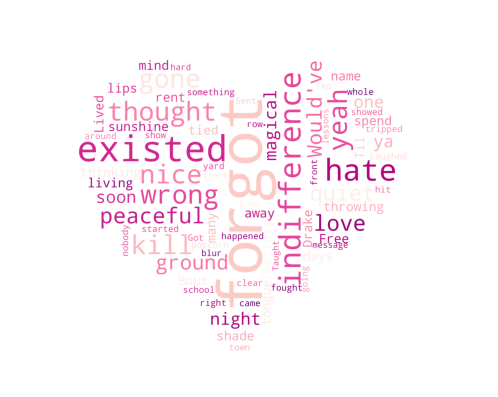

In [119]:
# We need to import some packages to make word clouds.
from wordcloud import WordCloud
from PIL import Image

# This function creates a word cloud for a given song.
def generate_lyrics_wordcloud(song_name):
    cloud = WordCloud(scale=3,
                      max_words=150,
                      colormap='RdPu',
                      mask=np.array(Image.open('data/images/heart.jpeg')),
                      background_color='white',
                      collocations=False).generate(lover_df.get('Lyrics').loc[song_name])
    plt.figure(figsize=(7, 5), dpi=100)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

default_lover = 'I Forgot That You Existed'

song_options_lover = np.array(lover_df.index)
song_widget_lover = widgets.Dropdown(options=song_options_lover, description='Song', layout={'width': '525px'}, value=default_lover)

def change_rec_lover(change):
    if change['name'] == 'value' and change['new'] != change['old']:
        clear_output()
        display(song_widget_lover)
        display(HTML('Note: It may take a few seconds for the updated word cloud to appear.'))
        generate_lyrics_wordcloud(song_widget_lover.value)

display(song_widget_lover)
generate_lyrics_wordcloud(default_lover)
song_widget_lover.observe(change_rec_lover)

## Parting Thoughts 💭 

Big congratulations on finishing the Midterm Project! 🎉 We hope this experience gave you a taste of what doing data science is really like: frustrating at times, but incredibly satisfying when you produce a finished product you're proud of! If you feeling like telling everyone you know about the cool song recommender you created or the beautiful word clouds you generated, that's a good sign!

You're likely a stronger programmer and data scientist now than you were before you started this project, after all the effort you put into completing it. As a reminder of the growth you can achieve through hard work, and the fact that success does not come by accident, here's a spoof of Taylor Swift's song `'Mastermind'` about succeeding in DSC 10. 

```
Once upon a time, 
pandas were just bears, Jupyter was in the sky.
I took a ten week course in data science,
And learned otherwise.

In the front row of class, 9am.
Asking questions on Ed yet again.
Churning through extra practice problems.
Solutions? Don't need them.

What if I told you none of it was accidental?
From the first class that you taught me, nothing was gonna stop me?
I laid the groundwork and then did the hard work.
The test cases all passed one at a time.

What if I told you I'm a mastermind?
I'm good at data science.
I just worked all the time. 
And now I'm a mastermind.

You see, all the wisest students had to do it this way.
'Cause we were born to understand things as we toil away.

If you fail to plan, you plan to fail.
Strategy sets the scene for the tale.
So I cleared time in my schedule 
For a lot of nights in Geisel.

What if I told you none of it was accidental?
From the first class that you taught me, nothing was gonna stop me?
I laid the groundwork and then did the hard work.
The test cases all passed one at a time.

What if I told you I'm a mastermind?
I’m good at data science.
It was all by design.
And now I'm a mastermind.

No one wanted to work with me on the big project. 
So I've been getting all the tutor help I can get.
I think they love me for all the effort I have spent.
This is the first time I felt the need to confess.
And I swear, I'm only understanding this material 
'Cause I care.

So I told you none of it was accidental.
And when finals were graded, nothing was gonna stop me.
I peeked at Gradescope, exclaimed with newfound hope, 
"My final exam grade is ninety nine!"

Because I am a mastermind.
I'm good at data science. 
Yeah, all I can do is smile.
'Cause I'm a mastermind.
```








<a id='emojiquiz'></a>

## Taylor Swift Emoji Quiz 💯

Just for fun, here are some emojis that describe particular Taylor Swift songs. See how many you can identify! We'll post the answers on Ed after the project is due. 

1. 👋👋👶
1. ⛔🎮
1. 👑❤
1. 🖼🔥
1. 🕛🌧
1. 🍀 1️⃣
1. 📃💍
1. ❄🔁
1. 😢➡🎸
1. 🎠
1. 🔎🧶
1. ⬛🐶
1. 🏹
1. ❄🏖
1. 🚗💨
1. 👎🩸
1. 🍭🚫
1. 🍾😧
1. 🍦🏝
1. 🧼🧹
1. 🃏🔁
1. 🌟💡
1. 📜➡🍼
1. 🧨✈
1. 💕📖
1. 🗣⏳
1. 👻😱
1. 🔌👆
1. 🚫🦸‍♀️
1. 👋💂‍♂️🏙



## References and Data Sources 📖

If you're interested in learning more about the data and analysis that inspired this project, check out Alice Zhao's blog post [A Data Scientist Breaks Down All 10 Taylor Swift Albums (The Extended Version)](https://adashofdata.com/2023/03/01/a-data-scientist-breaks-down-all-10-taylor-swift-albums-the-extended-version/). Here's a plot from Alice's analysis showing that Taylor Swift's music is getting more experimental over time.

<center><img src='data/images/evolution.jpg' width=600></center>

Below are links to all the resources we used in developing this project. Thanks to all the people who provided these resources!

- Shayna Kothari, [Taylor Swift Lyric Searcher](https://shaynak.github.io/taylor-swift/) and [source code](https://github.com/shaynak/taylor-swift) 
- Tia Plagata, [How to Create Beautiful Word Clouds in Python](https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214)
- Melanie Walsh, [Introduction to Cultural Analytics & Python](https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html)
- Cameron Watts, [Extracting Song Data From the Spotify API Using Python](https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50)
- Alice Zhao, A Dash of Data, [A Data Scientist Breaks Down All 10 Taylor Swift Albums (The Extended Version)](https://adashofdata.com/2023/03/01/a-data-scientist-breaks-down-all-10-taylor-swift-albums-the-extended-version/) and [source code](https://github.com/adashofdata/taylor_swift_data)
- Lyrics data from [Genius API](https://genius.com/)
- Musical data from [Spotify API](https://developer.spotify.com/)


**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

none

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

## Submission Instructions 📧

As usual, follow these steps to submit your assignment:

Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
1. Read through the notebook to make sure everything is fine and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope. 
1. If working with a partner, don't forget to add your partner as a group member on Gradescope!
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

If running all the tests at once causes a test to fail that didn't fail when you ran the notebook in order, check to see if you changed a variable's value later in your code. Make sure to use new variable names instead of reusing ones that are used in the tests. 

Remember, the tests here and on Gradescope just check the format of your answers. We will run correctness tests after the due date has passed.

In [121]:
grader.check_all()

q0_1 results: All test cases passed!

q0_2 results: All test cases passed!

q0_3 results: All test cases passed!

q1_1 results: All test cases passed!

q1_10 results: All test cases passed!

q1_12 results: All test cases passed!

q1_13 results: All test cases passed!

q1_14 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_8 results: All test cases passed!

q1_9 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q3_1 results: All test cases passed!

q3_10 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 re